# DSML Data Analysis Project - Group 4  
**_Predicting Trip Duration from Ride-Hailing Trips in Chicago_**

*By Louis, Malak, Lena, and Eero*

---
## 📑 Table of Contents

1. 🎯 Executive Summary
2. 💼 Business Understanding
   - Business Objectives
   - Stakeholder Analysis
   - Business Success Criteria
   - Ethical Consideration
3. 🔍 Data Understanding
   - Data Source
   - Data Description
   - Data Limitations and Considerations
   - Data Exploration (?)
4. Data Preparation
   - Data Acquisition & Loading
   - Filter Application Check
   - Data Cleaning
   - Feature Engineering
   - Post-Prep Validation
5. Data Exploration
6. Descriptive Analysis
7. Modeling & Evaluation

This project was developed as part of the ***"Introduction to Data Science and Machine Learning"* module assignment**. Following the **CRISP-DM** process (Cross-Industry Standard Process for Data Mining), we aim to **explore**, **prepare**, **model** and **evaluate** data to address a real-world case (problem) using structured steps.

---
## 🎯 Executive Summary

This project **aims to predict trip duration** based on individual ride-hailing services trips in Chicago **by developing and comparing two predictive models** for estimating this target. 
Using historical ride-hailing data, we will build models to predict `trip_seconds` and evaluate their performance to determine which approach provides the most accurate and reliable predictions for operational use.

Our **first approach** was to predict traffic volume, deriveing this by dividing *trip seconds* by *trip miles*, representing the average duration per mile (higher values indicate greater congestion), thus indicating traffic volume/ defining a proxy for it.

After **reconsideration** and the first milestone's feedback we will predict only the trip duration.

### Predictive Task: Trip Duration Estimation

This project tackles a **supervised learning** problem — specifically, a **regression task**, where the goal is to predict **continuous trip duration values** (in seconds, based on the `trip_seconds` column).

We aim to learn how various ride-hailing attributes influence trip time, using **labeled data** (historical trips with known durations). The features used for prediction include:

- **Trip characteristics**: e.g. `trip_miles`
- **Financial features**: e.g. `fare`, `additional_charges`
- **Temporal factors**: Extracted from `trip_start_timestamp` (e.g. **hour**, **day of week**, **month**)
- **Geographic features**: `pickup_community_area` and `dropoff_community_area`
- **Weather-related data** *(optional)*: Integrated from an external dataset

*For more on the dataset and features, see "🔍 Data Understanding" below.*


---
## 💼 Business Understanding

**Ride-hailing services** use mobile apps such as Uber or Lyft to connect passengers to drivers, with the goal of providing **fast** and **cost-effective transportation** for users. Furthermore, reducing traffic congestion, lowering emissions, and increasing vehicle utilization are key incentives.

In **Chicago**, transit via bus and rail is on the rise. In **2023**, there was a total of **279.1 million rides**, marking a **13% increase from 2022**. Ride-hailing services have also seen **increased adoption**, especially in **downtown areas**. Fees for solo rides have even been implemented in the downtown area during peak times to encourage shared rides. Chicago remains one of the **most congested US cities**, especially during peak hours. Thus, the city is actively promoting shared mobility options, providing, for example, Divvy Bikes — a city-owned system for renting both bikes and scooters.

### Business Objectives

With that being said, one could argue that predicting a variable like `trip duration` has real-world value, as it helps improve both operational efficiency and policy decisions, making it a high-impact use cas for data science.

The primary goal of this project is to develop accurate trip duration prediction models that can enhance ride-hailing service operations. Precise trip duration predictions are crucial for:

- **Customer Experience Enhancement**: Providing accurate estimated time of arrival (ETA) to passengers, reducing uncertainty and improving satisfaction
- **Operational Efficiency**: Optimizing driver allocation and routing to minimize idle time and maximize utilization
- **Dynamic Pricing**: Enabling surge pricing strategies based on predicted trip duration and demand patterns
- **Resource Planning**: Anticipating peak demand periods and ensuring adequate driver supply

### Stakeholder Analysis

Trip duration prediction is critical for multiple stakeholders across the ride-hailing ecosystem:

**Primary Stakeholders**
- **Operations Team**: Will use predictions for driver dispatch and resource allocation to optimize fleet deployment and reduce idle time
- **Customer Service**: Requires accurate ETAs to manage customer expectations and handle complaints effectively
- **Product Management**: Needs insights for app feature development and user experience improvements
- **Data Science Team**: Responsible for model development, validation, and deployment

**Secondary Stakeholders**
- **Drivers**: Benefit from optimized routing and reduced idle time, leading to increased earnings potential
- **Passengers**: Experience improved service through accurate time estimates and enhanced reliability
- **Business Leadership**: Interested in operational efficiency metrics and cost reduction opportunities

**External Stakeholders**
- **Ride-hailing Providers**: Use accurate predictions for fleet deployment, dynamic pricing strategies, and competitive advantage
- **Regulators and City Planners**: Can leverage this data to identify high-congestion areas and evaluate the effectiveness of traffic regulations or infrastructure changes, supporting broader urban mobility planning

The multi-stakeholder nature of this problem underscores the significant business value of accurate trip duration prediction models in improving both operational efficiency and policy-making decisions.

> **Note:**
> The identification of these stakeholders and their interests is directly derived from our earlier discussion on the relevance and impact of trip duration prediction in Chicago’s ride-hailing ecosystem. This analysis was further refined and validated with assistance from Claude AI, ensuring alignment with the key business and operational drivers we outlined.

### Business Success Criteria
Success will be measured by:
- **Model Accuracy (Comparison)**: Achieving good performance metrics for trip duration predictions, like a low mean absolute error (MAE) (e.g. of less than 5 minutes), by identifying which of the two modeling approaches provides superior performance
- **Practical Applicability**: Ensuring our code and models can be run and processed in acceptable amount of time (even though it is a rather simple project, not for implementation in any real-time, real-life operational systems)
- **Stakeholder Value**: Demonstrating clear and understandable documentation, as well as business benefits (mentioned above) through improved predictions

### Ethical Considerations
As students being introduced into the data science world and having had an ethics session, we acknowledge the importance of responsible AI practices learned in our course. While our academic project uses publicly available, anonymized trip data (no detailed data on personal information about drivers or customers) and focuses on predictive modeling rather than automated decision-making that have deep use of AI (like the cases discussed in lecture), we commit to transparent methodology, accurate reporting of limitations, and thorough documentation of our analysis process.

---
## 📊 Data Understanding

In [348]:
# Core libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Other libraries will be imported as needed throughout the notebook
# This helps team members understand what each section requires

### I. Data Source Overview 

**Primary Dataset:** Chicago Transportation Network Providers (TNP) - Trips (2023-2024)
* **Data Source:** [City of Chicago Open Data Portal](https://data.cityofchicago.org/Transportation/Transportation-Network-Providers-Trips-2023-2024-/n26f-ihde/about_data)
* **Initial Exploration & Filtering:** Before downloading the dataset, we explored and filtered it  bit directly on the portal using the built-in SQL query interface during our first team meeting 
    *(see more details below in "III. Data Filtering Strategy")*:
    https://data.cityofchicago.org/Transportation/Transportation-Network-Providers-Trips-2023-2024-/n26f-ihde/explore/query/SELECT%0A%20%20%60trip_id%60%2C%0A%20%20%60trip_start_timestamp%60%2C%0A%20%20%60trip_end_timestamp%60%2C%0A%20%20%60trip_seconds%60%2C%0A%20%20%60trip_miles%60%2C%0A%20%20%60percent_time_chicago%60%2C%0A%20%20%60percent_distance_chicago%60%2C%0A%20%20%60pickup_census_tract%60%2C%0A%20%20%60dropoff_census_tract%60%2C%0A%20%20%60pickup_community_area%60%2C%0A%20%20%60dropoff_community_area%60%2C%0A%20%20%60fare%60%2C%0A%20%20%60tip%60%2C%0A%20%20%60additional_charges%60%2C%0A%20%20%60trip_total%60%2C%0A%20%20%60shared_trip_authorized%60%2C%0A%20%20%60shared_trip_match%60%2C%0A%20%20%60trips_pooled%60%2C%0A%20%20%60pickup_centroid_latitude%60%2C%0A%20%20%60pickup_centroid_longitude%60%2C%0A%20%20%60pickup_centroid_location%60%2C%0A%20%20%60dropoff_centroid_latitude%60%2C%0A%20%20%60dropoff_centroid_longitude%60%2C%0A%20%20%60dropoff_centroid_location%60%0AORDER%20BY%20%60trip_start_timestamp%60%20DESC%20NULL%20FIRST/page/filter
* **Data Provider:** City of Chicago (Last Updated: February 27, 2025)
* **Data Period:** 2023-2024
* **Sample Size:** originally 174M rowss (*downloaded less, see below*)
* **Geographic Coverage:** Chicago metropolitan area
* **Data Collection Method:** Routine reporting by Transportation Network Providers (ride-hailing companies) to the City of Chicago as required by ordinance

> **Data Quality Note:** 
> *(as documented on official dataset website)*:
> "Census Tracts are suppressed in some cases, and times are rounded to the nearest 15 minutes. Fares are rounded to the nearest $2.50 and tips are rounded to the nearest $1.00."

### II. Data Acquisition & Loading
To reduce the data while preserving trips from different timeframes throughout 2023–2024, we initially considered to apply another filter base on the Trip ID — for example, including every trip containing "197." After discussion, we concluded this approach could introduce bias. We decided on downloading all rows and afterwards reducing the data to every 100th entry via a Python script. The script was written by ChatGPT.

In [ ]:
import pandas as pd
import requests
import time
from io import StringIO

# API-URL und Filter
base_url = "https://data.cityofchicago.org/resource/n26f-ihde.csv"
params_base = {
    "$where": "percent_time_chicago = 1 AND percent_distance_chicago = 1 AND tip = 0 AND shared_trip_authorized = false AND shared_trip_match = false",
    "$limit": 1000000
}

dfs = []
num_blocks = 34

for i in range(num_blocks):
    offset = i * 1_000_000
    params = params_base.copy()
    params["$offset"] = offset
    print(f"[{i+1}/{num_blocks}] Lade Daten ab Offset {offset:,} ...")

    try:
        response = requests.get(base_url, params=params)
        response.raise_for_status()
        
        # Inhalt prüfen
        if len(response.text.strip()) == 0:
            print(f"⚠️  Keine Daten empfangen bei Block {i+1}.")
            break
        
        chunk = pd.read_csv(StringIO(response.text))
        dfs.append(chunk)
        print(f"✅ {len(chunk):,} Zeilen geladen.")
        time.sleep(1)

    except Exception as e:
        print(f"❌ Fehler bei Block {i+1}: {e}")
        print("Inhalt der Antwort:")
        print(response.text[:1000])  # Nur die ersten 1000 Zeichen zeigen
        break

# Nur fortfahren, wenn Daten vorhanden
if dfs:
    print("🔄 Zusammenführen der Blöcke ...")
    full_df = pd.concat(dfs, ignore_index=True)

    print("🔃 Sortiere nach trip_start_timestamp ...")
    full_df['trip_start_timestamp'] = pd.to_datetime(full_df['trip_start_timestamp'], errors='coerce')
    full_df = full_df.dropna(subset=['trip_start_timestamp'])
    full_df = full_df.sort_values(by='trip_start_timestamp')

    print("📊 Ziehe jede 100. Zeile ...")
    sample_df = full_df.iloc[::100]

    print(f"💾 Speichere Datei mit {len(sample_df):,} Zeilen ...")
    sample_df.to_csv("Ridehailing_Chicago_sample327k.csv", index=False)
    print("✅ Fertig!")
else:
    print("❌ Keine Daten zum Verarbeiten.")


**Result:** our raw data set "Ridehailing_Chicago_sample327k.csv"

We **now** have **327,526 individual trips** to work with, fulfilling the condition of at least 100,000 rows in the raw data. With 77 different area codes — each for pickup and dropoff — this results in an average of approximately 55 identical trips per unique pickup–dropoff area code combination.

After **exporting**, we will **load/ read-in the data**, check our filter application, inspect the data structure, clean the data, and do some feature engineering before moving on to modeling.

In [482]:
# Read the created .csv file
rds = pd.read_csv("Ridehailing_Chicago_sample327k.csv")

### III. Initial Filtering & Validation 

To **improve** data **quality** and **ensure relevance** for our Chicago traffic prediction task, we applied the following filters on the City of Chicago Open Data portal prior to download:
1. **Geographic Scope:** Only trips with 100% time and distance within Chicago (`percent_time_chicago` = 100 AND `percent_distance_chicago` = 100)
2. **Trip Type:** Only individual (non-shared) trips to avoid confounding effects of passenger pickups during the trip
3. **Payment Method:** Exclude trips with tips to focus on fare-based congestion indicators

> Additional data cleaning/ filtering and feature-level preprocessing will be addressed in the "🛠️ Data Preparation" phase.

To verify that these filters were correctly applied though, we ran the following validation code:

In [350]:
rds['percent_time_chicago'] = rds['percent_time_chicago'].astype(str)
rds['percent_distance_chicago'] = rds['percent_distance_chicago'].astype(str)

all_conditions_met = (
    (rds['shared_trip_match'] == False) &
    (rds['shared_trip_authorized'] == False) &
    (rds['tip'] == 0) &
    (rds['percent_time_chicago'] == '1') &
    (rds['percent_distance_chicago'] == '1')
)

print("All rows match filters:", all_conditions_met.all())

All rows match filters: True


### IV. Data Description

> For a quick overview of our planned usage of key features, please refer to the "Predictive Task" section above in "🎯 Executive Summary".

The given dataset provides us various features. Below, we will go over each one and **evaluate whether** the **feature** will be **useful for our prediction task**, if we will only include data with a set value, or if it should be excluded during our data preparation.

**Key Features Available (24 columns total):**

**Target Variable:**
* `trip_seconds`: Continuous variable representing total trip duration from pickup to dropoff (measured in seconds)

**Identifiers**
* `trip_id`: Unique trip identifier - **EXCLUDE FOR MODELING** (in use as primary key before though)

**Trip Characteristics**
* `trip_miles`: Trip distance in miles, obviously - **INCLUDE**
* `percent_time_chicago` & `percent_distance_chicago`: Percentage of trip within Chicago boundaries - **FILTERED & EXCLUDE** (only 100% Chicago trips will be included,  trips with routes outside of Chicago do not fit our prediction task of modeling traffic volume *in Chicago*.)
* `shared_trip_authorized`, `shared_trip_match`, `trips_pooled`: Shared ride indicators - **FILTERED & EXCLUDE** (only non-shared trips included to avoid confounding factors, like trips stopping for other passengers, as they would or could impact trip duration)

**Temporal Features**
* `trip_start_timestamp`: Trip start time (as time is an important factor in traffic, this feature is useful for identifying peak hours and traffic patterns) - **INCLUDE**
* *Derived features*: Hour, day of week, month, …
* `trip_end_timestamp`: Trip end time - **EXCLUDE**

**Geographic Features**
* `pickup_community_area` & `dropoff_community_area`: Community area identifiers (77 zones in Chicago) - **INCLUDE** (traffic or trip duration varies by location, and these provide a robust feature for space)
* `pickup_census_tract` & `dropoff_census_tract`: Census tract identifiers (800+ zones) - **EXCLUDE** (quite specific, hence, higher risk of missing data, less robust for comparison)
* `pickup_centroid_latitude`, `pickup_centroid_longitude` & `pickup_centroid_location`: Pickup coordinates - **(MAYBE EXCLUDE)** (too specific for comparison, but may keep latitude and longitude)
* `dropoff_centroid_latitude`, `dropoff_centroid_longitude` & `dropoff_centroid_location`: Dropoff coordinates - **(MAYBE EXCLUDE)** (too specific for comparison, but may keep latitude and longitude)

**Financial Features**
* `fare`: Base fare amount, serves as the starting price of the ride, often influenced by distance and base rates. - **INCLUDE** (reflects dynamic pricing to some extent and can help signal traffic or demand levels)
* `tip`: Tip amount - **FILTERED & EXCLUDE** (as tipping is subjective and influenced by user generosity, culture, driver service quality or other factors; also tips happen at end of ride, while base fares can be calculated beforehand)
* `additional_charges`: Extra fixed/location-based fees – **INCLUDE**
(these charges, like airport or downtown surcharges, can indirectly signal longer or slower trips, since such zones often involve higher congestion or distance)
* `trip_total`: Total trip cost – **EXCLUDE** (it is the sum of `fare` and `additional_charges` (as we are excluding tips), which are already included; keeping all three would introduce redundancy and multicollinearity without adding new information)

**Additional Data Sources**

**Weather Data Integration:**
* **Source:** Meteostat API for historical weather data
* **Features:** Temperature, precipitation, wind speed, weather conditions
* **Integration Method:** Feature engineering process will merge weather data based on trip start timestamp and location
* **Rationale:** Weather conditions significantly impact traffic patterns and trip duration

> **Note:** Detailed weather data integration methodology will be documented in the "🛠️ Data Preparation" phase.

### V. Data Limitations & Modeling Considerations

**Data Quality Issues**
* **Privacy Measures**: Census tract suppression and coordinate rounding may result in missing or imprecise or missing location data, limiting geographic accuracy.
* **Time Precision:** 15-minute timestamp rounding may blur peak hour patterns
* **Financial Precision:** Fare and tip rounding limits pricing analysis precision
* **Geographic Aggregation:** Using community areas (77 zones) rather than census tracts (800+) reduces spatial granularity but improves model practicality

**Data Representation Challenges**
* **Temporal Bias:** Dataset may over-represent certain time periods or seasons
* **Geographic Gaps:** Some community areas may have fewer trips, affecting model performance
* **Service Mixing:** Different ride services (Uber, Lyft) are combined, hiding service-specific patterns
* **Missing Context:** No information about surge pricing or traffic conditions

**Modeling Considerations**
* **Feature Availability:** Some features (like actual trip distance) are only known after the trip ends
* **Changing Patterns:** Trip behavior changes over time (new neighborhoods, events, COVID-19 impacts)
* **Real-time Constraints:** Model must be fast enough for real-time predictions
* **Generalization:** Model trained on this data may not work well in other cities or time periods

**Key Takeaways**
* **Understand Your Data:** Always consider what's missing or modified in your dataset
* **Test Thoroughly:** Validate model performance across different time periods and locations
* **Monitor Performance:** Real-world model performance may differ from training results
* **Accept Limitations:** No model is perfect - understanding limitations helps set realistic expectations

*Note: While this project is for educational purposes, these considerations reflect key concepts from our course lectures and workshops about responsible data science and machine learning practices.*

### VI. Data Exploration & Visualization 📊

In this section, we begin **exploring the dataset through visual and statistical summaries** to uncover initial patterns, distributions, anomalies, and relationships between variables. This **exploratory data analysis (EDA)** phase helps us better understand the structure and nuances of the data before applying any modeling or transformations.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("whitegrid")                  # Clean grid background
sns.set_context("notebook")                 # Scale fonts for notebook
colors = sns.color_palette("colorblind")    # Global color palette
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# print(plt.style.available)

#### Dataset Overview
*(This section provides a high-level summary of the dataset, including its dimensions, overall structure, feature types and ranges, as well as the data source and time span covered.)*

In [ ]:
# Basic dataset information
print("DATASET OVERVIEW:")
print(f"Dataset shape: {rds.shape}")
print(f"Number of trips (rows): {rds.shape[0]:,}")
print(f"Number of features (cols): {rds.shape[1]}")
print(f"Memory usage: {rds.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

> **Note** *(by ChatGPT, since we were wondering)*: While the original CSV file contains approximately 372,000 rows, Jupyter Notebook (in VS Code) limits the visible preview in the DataFrame viewer to the first 200,000 rows for performance reasons. This does not affect the full data in memory — all rows are loaded and accessible for analysis via code.

In [ ]:
# Column information
print("COLUMN INFORMATION (column names and data types):")
print(rds.dtypes)

In [ ]:
# First few rows
print("SAMPLE DATA:")
rds.head()

#### Data Quality Assessment

*(This section evaluates the trustworthiness of the data by examining missing values, incorrect or inconsistent data types, duplicate entries, and the presence of outliers, including extreme or implausible values such as negative durations or distances.)*

In [ ]:
rds.info()

**Missing Values**

This inspection using `rds.info()` shows that some variables, especially location-related ones (e.g. `census_tract` and `community_area` fields), contain **missing values**. This is expected due to privacy-driven census tract suppression by the data provider. These gaps will be taken into account, as we plan to handle missing rows during data preparation.

In [ ]:
missing = rds.isnull().sum()
missing_p = (missing/len(rds))*100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing %': missing_p
}).sort_values('Missing %', ascending=False)
print(missing_df[missing_df['Missing Count'] > 0])


**Data Types**

Earlier in the `rds.info()`-output (and before that through `rds.dtypes`) issues concerning the **datatypes** were visible.

We can see that both `trip_start_timestamp` and `trip_end_timestamp` are stored as `object` types rather than `datetime`, which we will address/ convert in the preparation phase.

> **Note:** `percent_time_chicago` and `percent_distance_chicago`both are stored as `object` too (whilst a numeric value would be more fitting) but will be excluded from modeling, so no further checks performed.

Since unfitting or incorrect data types can **hint at potential inconsistencies** in the values (concerning the type) for the specific feature, we'll check for any **timestamp anomalies**…

In [ ]:
# Try to convert trip_start_timestamp to datetime, forcing errors to NaT
rds['trip_start_timestamp_dt'] = pd.to_datetime(rds['trip_start_timestamp'], errors='coerce')
rds['trip_end_timestamp_dt'] = pd.to_datetime(rds['trip_end_timestamp'], errors='coerce')

# Find rows where conversion failed (NaT means conversion failure)
start_anomalies = rds[rds['trip_start_timestamp_dt'].isna()]
end_anomalies = rds[rds['trip_end_timestamp_dt'].isna()]

print(f"Number of anomalies in trip_start_timestamp: {len(start_anomalies)}")
print(f"Number of anomalies in trip_end_timestamp: {len(end_anomalies)}")

# Drop the temporary datetime columns since feature engineering will be done later
rds.drop(['trip_start_timestamp_dt', 'trip_end_timestamp_dt'], axis=1, inplace=True)

**Duplicates**

Identifying and handling duplicate rows is important to ensure data integrity and prevent biased results during analysis or modeling.
The following code confirms the presence of duplicate records in the dataset, which will be addressed more thoroughly in the upcoming Data Cleaning phase.

In [ ]:
duplicates = rds.duplicated().sum()
print(f"Duplicate rows: {duplicates:,} ({duplicates/len(rds)*100:.2f}%)")

**Outliers**

While statistical outliers can represent valid data points, they are often flagged (and sometimes removed) because they may indicate data entry errors, measurement issues, or extreme cases that fall far outside the typical range. In many cases, such points may not be representative of the patterns we aim to model.

The following summary statistics provide a useful overview of the numeric columns, including quantiles that are commonly used in outlier detection methods such as the interquartile range (IQR) technique.

In [ ]:
print("BASIC STATISTICS")
rds.describe()

This summary provides valuable insights that we'll revisit during data preprocessing. For instance, regarding trip duration (`trip_seconds`):

- The **average trip duration is 959 seconds (~16 minutes)**.
- The distribution is **right-skewed**, indicated by the mean being higher than the median (50th percentile at 761 seconds, or ~12.5 minutes). This suggests the ***presence of longer-duration outliers*** pulling the average upward.
- Most trips fall within the **8 to 20 minute range** (25th to 75th percentile: 489 to 1,220 seconds).

*However, we want to focus on the following…*
- **Minimum** `trip_seconds`: 1 second
- **Maximum** `trip_seconds`: 13,501 seconds (~3.75 hours)
- **Minimum** `trip_miles`: 0.003 miles
- **Maximum** `trip_miles`: 89.1 miles

These values raise concerns about data quality, such as erroneous logging or edge-case scenarios.

One could also explore signals of anomalous trips or data entry errors, like this…

In [ ]:
# Checking for negative values
numerical_cols = ['trip_seconds', 'trip_miles', 'fare', 'additional_charges']
for col in numerical_cols:
    negative_count = (rds[col] < 0).sum()
    zero_count = (rds[col] == 0).sum()
    print(f"{col}: {negative_count:,} negative values, {zero_count:,} zero values")

# Extreme values checking

very_short = (rds['trip_seconds'] < 60).sum()  # Less than 1 minute
very_long = (rds['trip_seconds'] > 10800).sum()  # More than 3 hours
print(f"\nTrip duration quality:")
print(f"Very short trips (<1 min): {very_short:,} ({very_short/len(rds)*100:.2f}%)")
print(f"Very long trips (>3 hours): {very_long:,} ({very_long/len(rds)*100:.2f}%)")

zero_miles = (rds['trip_miles'] == 0).sum()
long_trips = (rds['trip_miles'] > 100).sum()
print(f"\nTrip distance quality:")
print(f"Zero mile trips: {zero_miles:,} ({zero_miles/len(rds)*100:.2f}%)")
print(f"Very long trips (>100 miles): {long_trips:,} ({long_trips/len(rds)*100:.2f}%)")


… Data quality looks generally good, with no negative or zero values in `trip_seconds` or `trip_miles`, indicating clean duration and distance records. The `fare` and `additional_charges` columns have some zero values, which could reflect promotional rides or data entry gaps. Extremely short or long trips are **rare edge cases** and unlikely to significantly distort the dataset.


In [ ]:
# VISUALIZATION

plt.figure(figsize=(10, 3))

# First subplot: trip_seconds
plt.subplot(1, 2, 1)
sns.boxplot(x=rds['trip_seconds'], color=colors[0])
plt.title('Box Plot of Trip Durations')
plt.xlabel('Trip Duration (seconds)')

# Second subplot: trip_miles
plt.subplot(1, 2, 2)
sns.boxplot(x=rds['trip_miles'])
plt.title('Box Plot of Trip Distances')
plt.xlabel('Trip Distance (miles)')

# Show both plots
plt.tight_layout()
plt.show()

- The **box** represents the **interquartile range (IQR)**/ the middle 50% of values (from the 25th to the 75th percentile).
- The **horizontal line inside** the box shows the **median** (50th percentile = value below which 50% of the data falls).
- The **“whiskers”** extend to points within **1.5 times the IQR** from the lower and upper quartiles, which is ~99.3% of data for a normal distribution (since 1.5 × IQR roughly corresponds to ±2.7 standard deviations).
- The **dots** beyond the whiskers are considered **outliers—values** that fall outside this typical range.

In this case, we can clearly see:
- **Rather long right-side tails** indicating right-skewed distribution.
- **Several extreme outliers** on the high end (long-duration trips).

This **visual confirms our earlier finding**: while most trips cluster within a typical range, some extremely long or short trips stand out as potential anomalies, which may warrant removal or further inspection.

Lastly, given these findings, a key step in our *Data Cleaning* process will be **outlier detection and handling**. Removing or adjusting such values is important to ensure they don’t distort model training or bias performance metrics. We aim to focus on representative "typical" ride patterns, and extreme observations (whether due to error or atypical events) can interfere with this objective.

#### Exploratory Analysis & Visualization

*(This section investigates feature distributions, relationships between variables, and visual patterns using fitting plots such as histograms, boxplots, and correlation heatmaps.)*

* Trip duration distribution patterns
* Relationship between trip distance and duration
* ~~Temporal patterns in trip frequency and duration~~ *(later)*
* Geographic features distribution and relationship to target
* Financial features structure patterns and relationship to target
* ~~Weather features insights and impact on trip duration~~ *(later)*

> **Note:** **Temporal Analysis** and **Weather Data** will be included later, after the official "Feature Engineering" step during "Data Preparation," where we will perform the respective feature extraction and enrichment tasks.

##### Target Variable Analysis

Understanding the distribution of the target variable `trip_seconds` is crucial for choosing appropriate modeling techniques and identifying potential data issues such as skewness or outliers.

The following code provides information that can also be extracted using the `.describe()` method…

In [ ]:
# TARGET VARIABLE ANALYSIS - Basic stats

target = rds['trip_seconds']

print(f"Count: {len(target):,}")
print(f"Mean: {target.mean():.2f} seconds ({target.mean()/60:.2f} minutes)")
print(f"Median: {target.median():.2f} seconds ({target.median()/60:.2f} minutes)")
print(f"Std Dev: {target.std():.2f} seconds")
print(f"Min: {target.min():.2f} seconds")
print(f"Max: {target.max():.2f} seconds ({target.max()/3600:.2f} hours)")
print(f"Skewness: {target.skew():.2f}")
print(f"Kurtosis: {target.kurtosis():.2f}")

# Percentiles
print(f"\nPercentiles:")
percentiles = [1, 5, 10, 25, 50, 75, 90, 95, 99]
for p in percentiles:
    val = target.quantile(p/100)
    print(f"{p}th percentile: {val:.2f} seconds ({val/60:.2f} minutes)")
print(f"Range: {target.quantile(0.25)/60:.2f} - {target.quantile(0.75)/60:.2f} minutes (25th to 75th percentile)")

> **Note** (for ourselves):
> **Skewness** measures the **asymmetry of the data distribution**. A positive skew indicates a longer right tail (more extreme high values), while a negative skew indicates a longer left tail. **Kurtosis** describes the **"tailedness" or extremity of outliers** compared to a normal distribution. Positive kurtosis means heavier tails (more extreme values), and negative kurtosis means lighter tails. Together, they help assess data-shape and potential outliers.


In [ ]:
# TARGET VARIABLE VISUALIZATION

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Histogram - All data
axes[0, 0].hist(target, bins=50, alpha=0.7, color=colors[0], edgecolor='black')
axes[0, 0].set_title('Distribution of Trip Duration')
axes[0, 0].set_xlabel('Trip Duration (seconds)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(target.mean(), color='black', linestyle='-', label='Mean')
axes[0, 0].axvline(target.median(), color='black', linestyle='--', label='Median')
axes[0, 0].legend()

# Histogram - Filtered for better visibility (95th percentile)
filtered_target = target[target <= target.quantile(0.95)]
axes[0, 1].hist(filtered_target, bins=50, alpha=0.7, color=colors[1], edgecolor='black')
axes[0, 1].set_title('Distribution of Trip Duration (95th Percentile)')
axes[0, 1].set_xlabel('Trip Duration (seconds)')
axes[0, 1].set_ylabel('Frequency')

# Box plot
axes[1, 0].boxplot(target, vert=True)
axes[1, 0].set_title('Box Plot of Trip Duration')
axes[1, 0].set_ylabel('Trip Duration (seconds)')
axes[1, 0].set_xticks([]) # Remove x-axis tick marks (since it's just one box — no category needed)

# Log transformation visualization - For more symmetric view of data (Claude AI's idea)
log_target = np.log1p(target)
axes[1, 1].hist(log_target, bins=50, alpha=0.7, color=colors[4], edgecolor='black')
axes[1, 1].set_title('Log-transformed Trip Duration')
axes[1, 1].set_xlabel('Log(Trip Duration + 1)')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

The four plots collectively provide a comprehensive view of the **trip duration distribution**…

* **Top-left (Basic Histogram):**
  Trip durations are heavily **right-skewed**, with most rides under 2,000 seconds (~33 minutes). As observed and mentioned earlier, the **mean exceeds the median**, indicating the presence of longer trips pulling the average up. This visual pattern aligns with our earlier summary statistics — the **high skewness (2.13)** confirms the right-skew, and the elevated **kurtosis (8.33)** reflects the presence of extreme outliers (very long trips).

* **Top-right (95th Percentile Histogram):**
  By filtering out the top 5% of longest trips, we get a clearer insight into the **"typical" range** of trip durations, revealing a **more granular view of the dense middle** of the distribution.

* **Bottom-left (Box Plot):**
  The box plot highlights **concentration of durations below \~2,500 seconds**, while the **long whiskers and many outliers** confirm  presence of extreme values (as plotted before).

* **Bottom-right (Log-transformed Histogram):**
  Applying a log transformation to the trip duration compresses extreme values and reduces right-skewness. The resulting distribution appears more **symmetrical and balanced**, which can help with clearer pattern recognition and may improve the stability or interpretability of some analytical methods.



*Why We Included the Log-transformed Plot:*

To complete a balanced **2×2 subplot grid**, we added the **log-transformed view of trip durations** as a fourth plot. This form was recommended to us *by Claude AI* to address the **high skewness** of the original distribution. The log transformation (`log1p`) helps compress extreme values and reveal hidden patterns, providing a more normalized view of the data — especially useful when preparing features for modeling or identifying outliers more reliably.



##### Duration vs Distance Analysis

Clearly, a correlation between trip duration and distance always exists. Examining the relationship between `trip_seconds` and `trip_miles` helps reveal underlying travel patterns and can indicate whether simple or more complex models are needed.

In [ ]:
rds['trip_miles'].describe()

In [ ]:
# TRIP DISTANCE VISUALIZATIONS

# Create 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Histogram: Trip Miles
axes[0, 0].hist(rds['trip_miles'], bins=50, alpha=0.7, color=colors[0], edgecolor='black')
axes[0, 0].axvline(rds['trip_miles'].mean(), color='black', linestyle='-', linewidth=1.5, label='Mean')
axes[0, 0].axvline(rds['trip_miles'].median(), color='black', linestyle='--', linewidth=1.5, label='Median')
axes[0, 0].set_title('Distribution of Trip Miles')
axes[0, 0].set_xlabel('Trip Miles')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()

# 2. Box plot: Trip Distance
axes[0, 1].boxplot(
    rds['trip_miles'],
    patch_artist=True,                               # Allows box to be filled with color
    boxprops=dict(facecolor=colors[1]),             # Set fill color
    medianprops=dict(color='black', linewidth=2)    # Make median line visible
)
axes[0, 1].set_title('Box Plot of Trip Distance')
axes[0, 1].set_ylabel('Trip Distance (miles)')
axes[0, 1].set_xticks([])

# 3. Scatter plot: Trip Miles vs Trip Duration
axes[1, 0].scatter(rds['trip_miles'], rds['trip_seconds'], alpha=0.5, color=colors[7])
axes[1, 0].set_title('Trip Miles vs Trip Duration')
axes[1, 0].set_xlabel('Trip Miles')
axes[1, 0].set_ylabel('Trip Duration (seconds)')
axes[1, 0].grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(rds['trip_miles'].dropna(), rds['trip_seconds'].dropna(), 1)
p = np.poly1d(z)
axes[1, 0].plot(rds['trip_miles'], p(rds['trip_miles']), linestyle='--', color='black', alpha=0.8)

# 4. Histogram: Miles per Hour
rds['miles_per_hour'] = rds['trip_miles'] / (rds['trip_seconds'] / 3600)
valid_mph = rds[(rds['miles_per_hour'] > 0) & (rds['miles_per_hour'] <= 120)]['miles_per_hour']
axes[1, 1].hist(valid_mph, bins=50, alpha=0.7, color=colors[2], edgecolor='black')
axes[1, 1].set_title('Distribution of Miles per Hour')
axes[1, 1].set_xlabel('Miles per Hour')
axes[1, 1].set_ylabel('Frequency')

# Final layout adjustment
plt.tight_layout()
plt.show()

# Drop column to prevent target leakage in modeling
rds.drop(columns='miles_per_hour', inplace=True)


**About the Scatter Plot (Trip Miles vs Trip Duration):**
There is a clear positive correlation (longer trips generally take more time), but the points form a wide cloud around the trend line (especially above the trend line), indicating high variability. Many trips take longer than average, possibly due to traffic or stops. The distribution of miles per hour is right-skewed, reflecting some faster trips but mostly typical urban speeds.

*Other Plots:*
The histograms and box plot show reasonable distributions with no major issues, confirming that the data is generally consistent and well-behaved.

##### Geographic Analysis

Analyzing pickup and dropoff locations uncovers spatial trends and hotspots, which are important for location-based feature engineering and model accuracy.

In [351]:
rds['pickup_community_area'] = rds['pickup_community_area'].astype('Int64')
rds['dropoff_community_area'] = rds['dropoff_community_area'].astype('Int64')

> **Note:** The two `community_area` columns originally contains float values (e.g., 8.0, 32.0).
> We didn’t pay much attention to this earlier when inspecting data types, but converting it to integer type removes the unnecessary decimal points, making the community area identifiers cleaner and visually more pleasing in the upcoming plots and tables. *(We will do the conversion again in "Feature Engineering ⚙️" to be save, in cases of skipping this EDA part)*

In [ ]:
# Get unique counts of community areas
print(f"Unique Pickup Community Areas: {rds['pickup_community_area'].nunique()}")
print(f"Unique Dropoff Community Areas: {rds['dropoff_community_area'].nunique()}")

**Setup:** 

We define and compute summary statistics for trip durations grouped by pickup and dropoff community areas. In these statistics (that include mean, median, and trip counts), we convert trip duration from seconds to minutes for easier interpretation and will be used throughout the this analysis here.


In [ ]:
# Definition of needed stats

# Compute pickup stats from rds, we will be using
pickup_stats = rds.groupby('pickup_community_area')['trip_seconds'].agg(['mean', 'median', 'count'])
dropoff_stats = rds.groupby('dropoff_community_area')['trip_seconds'].agg(['mean', 'median', 'count'])

# Convert trip durations from seconds to minutes
pickup_stats['mean'] = pickup_stats['mean'] / 60
pickup_stats['median'] = pickup_stats['median'] / 60
dropoff_stats['mean'] = dropoff_stats['mean'] / 60
dropoff_stats['median'] = dropoff_stats['median'] / 60


In [ ]:
# GEOGRAPHIC ANALYSIS — Top 15 Extremes in Trip Duration by Pickup and Dropoff Areas

# Find top 15 areas with lowest and highest average trip durations for pickup
highest_avg_pickup = pickup_stats.sort_values('mean', ascending=False).head(15)
lowest_avg_pickup = pickup_stats.sort_values('mean').head(15)

# Find top 15 areas with lowest and highest average trip durations for dropoff
highest_avg_dropoff = dropoff_stats.sort_values('mean', ascending=False).head(15)
lowest_avg_dropoff = dropoff_stats.sort_values('mean').head(15)

# Create 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Top 15 Community Areas by Average Trip Duration', fontsize=18, weight='bold', y=1.02)

# Top-left: Highest avg trip duration (pickup)
axes[0, 0].bar(range(len(highest_avg_pickup)), highest_avg_pickup['mean'], color=colors[5], alpha=0.8)
axes[0, 0].set_title('Top 15 Pickup Areas with Highest Avg Trip Duration')
axes[0, 0].set_xlabel('Community Area')
axes[0, 0].set_ylabel('Avg Trip Duration (minutes)')
axes[0, 0].set_xticks(range(len(highest_avg_pickup)))
axes[0, 0].set_xticklabels(highest_avg_pickup.index, rotation=45)

# Top-right: Lowest avg trip duration (pickup)
axes[0, 1].bar(range(len(lowest_avg_pickup)), lowest_avg_pickup['mean'], color=colors[4], alpha=0.8)
axes[0, 1].set_title('Top 15 Pickup Areas with Lowest Avg Trip Duration')
axes[0, 1].set_xlabel('Community Area')
axes[0, 1].set_ylabel('Avg Trip Duration (minutes)')
axes[0, 1].set_xticks(range(len(lowest_avg_pickup)))
axes[0, 1].set_xticklabels(lowest_avg_pickup.index, rotation=45)

# Bottom-left: Highest avg trip duration (dropoff)
axes[1, 0].bar(range(len(highest_avg_dropoff)), highest_avg_dropoff['mean'], color=colors[7], alpha=0.8)
axes[1, 0].set_title('Top 15 Dropoff Areas with Highest Avg Trip Duration')
axes[1, 0].set_xlabel('Community Area')
axes[1, 0].set_ylabel('Avg Trip Duration (minutes)')
axes[1, 0].set_xticks(range(len(highest_avg_dropoff)))
axes[1, 0].set_xticklabels(highest_avg_dropoff.index, rotation=45)

# Bottom-right: Lowest avg trip duration (dropoff)
axes[1, 1].bar(range(len(lowest_avg_dropoff)), lowest_avg_dropoff['mean'], color=colors[8], alpha=0.8)
axes[1, 1].set_title('Top 15 Dropoff Areas with Lowest Avg Trip Duration')
axes[1, 1].set_xlabel('Community Area')
axes[1, 1].set_ylabel('Avg Trip Duration (minutes)')
axes[1, 1].set_xticks(range(len(lowest_avg_dropoff)))
axes[1, 1].set_xticklabels(lowest_avg_dropoff.index, rotation=45)

plt.tight_layout()
plt.show()


**Insights from Top 15 Community Areas by Average Trip Duration**

  **Highest Average Trip Durations** (left-hand side plots):

* **Community Areas 12 and 18** rank among the top 7 for average trip duration, **yet do not appear in the top 15 drop-off locations**.
  This likely suggests that most trips originating from these areas **leave the community**, possibly due to their **suburban nature** or **distance from central hubs**.
  Located in the **northern parts of Chicago**, this could indicate a pattern of **commuting from outer residential zones** into the city.

* In contrast, **Community Areas 76 and 56** have the **highest overall average trip durations** (~33 and ~28 minutes) and also appear as **top drop-off areas**.
  * This implies that trips in these regions **tend to stay within the area**, but still cover **relatively long distances**.
  * These areas might be **spread out**, have **fewer direct roads or public transport**, or include **homes and busy places** that are **far from each other**.
  * **Area 76** lies in the **far northwest corner**, and **Area 56** is in the **southwestern periphery** (both at city borders).

**Lowest Average Trip Durations** (right-hand side plots):

* **Community Areas 41, 37, and 42** have the **shortest average trip durations** (\~9–12 minutes), especially as **pickup locations**.
  * This suggests that trips in these areas tend to **stay local**, possibly due to **nearby services, amenities, or public transport**.
  * **Areas 41 and 42** also have the **lowest average drop-off durations**, reinforcing the pattern of short trips.
  * All three areas are located in the **southern part of Chicago**, which may indicate these neighborhoods are **more compact** or **well-connected**.

In [ ]:
# GEOGRAPHIC ANALYSIS - Top 7 Areas by Trip Count

# Find Top pickup and dropoff areas with highest count
highest_count_pickup = pickup_stats.sort_values('count', ascending=False)
highest_count_dropoff = dropoff_stats.sort_values('count', ascending=False)

# Print out Top 10 pickup and dropoff community areas (by count)
print("\nTop 7 Pickup Community Areas (by trip count):")
print(highest_count_pickup.head(7))
print("\nTop 7 Dropoff Community Areas (by trip count):")
print(highest_count_dropoff.head(7))


(Are the same)

In [ ]:
# VISUALIZATION - Top 15 Areas by Trip Count
# (still using highest_count_pickup and highest_count_dropoff from earlier)

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Top 15 Community Areas by Trip Count', fontsize=18, weight='bold', y=1.02)

# Top pickup areas by count
top_pickup = highest_count_pickup.head(15)
axes[0, 0].bar(range(len(top_pickup)), top_pickup['count'], alpha=0.7, color=colors[0])
axes[0, 0].set_title('Top 15 Pickup Areas by Trip Count')
axes[0, 0].set_xlabel('Community Area')
axes[0, 0].set_ylabel('Number of Trips')
axes[0, 0].set_xticks(range(len(top_pickup)))
axes[0, 0].set_xticklabels(top_pickup.index, rotation=45)

# Average trip duration by pickup area (in minutes)
axes[0, 1].bar(range(len(top_pickup)), top_pickup['mean'], alpha=0.7, color=colors[1])
axes[0, 1].set_title('Average Trip Duration by Top Pickup Areas')
axes[0, 1].set_xlabel('Community Area')
axes[0, 1].set_ylabel('Average Trip Duration (minutes)')
axes[0, 1].set_xticks(range(len(top_pickup)))
axes[0, 1].set_xticklabels(top_pickup.index, rotation=45)

# Same for dropoff
top_dropoff = highest_count_dropoff.head(15)
axes[1, 0].bar(range(len(top_dropoff)), top_dropoff['count'], alpha=0.7, color=colors[2])
axes[1, 0].set_title('Top 15 Dropoff Areas by Trip Count')
axes[1, 0].set_xlabel('Community Area')
axes[1, 0].set_ylabel('Number of Trips')
axes[1, 0].set_xticks(range(len(top_dropoff)))
axes[1, 0].set_xticklabels(top_dropoff.index, rotation=45)

axes[1, 1].bar(range(len(top_dropoff)), top_dropoff['mean'], alpha=0.7, color=colors[3])
axes[1, 1].set_title('Average Trip Duration by Top Dropoff Areas')
axes[1, 1].set_xlabel('Community Area')
axes[1, 1].set_ylabel('Average Trip Duration (minutes)')
axes[1, 1].set_xticks(range(len(top_dropoff)))
axes[1, 1].set_xticklabels(top_dropoff.index, rotation=45)

plt.tight_layout()
plt.show()


**Insights from Top 15 Community Areas by Trip Count**

* **Busy areas**:
  Community Areas **8**, **28**, and **32** have the most trips. These are likely busy spots like **downtown**, **transit stations**, or **shopping areas** (**8 and 32** are in **Central Chicago**, and **28** is on the **West Side**).

* **Range of trip duration**:
  Most areas in the top 15 have **average trip times between 13 and 15 minutes**, which makes sense for typical city travel.

* **Community Area 41**: Has one of the **shortest average trip durations** (\~9 minutes) and a **low median** (\~5.5 minutes). It's in the **South Side** and likely has **short, local trips** — maybe due to things being nearby.

* **Community Area 76**: Not in the top for count (ranked 9th), but shows **much longer trips** (average \~33 minutes). It's in the **Far North Side**, so trips from there may just **take longer** because of the location.

**Stakeholder Reflections? 🧠**

When interpreting these patterns, stakeholders and business users of a predictive model might ask:

* Are long trips from peripheral areas a result of poor infrastructure, or natural commuting patterns?
* Should we target **service improvements** (e.g., transit or rideshare coverage) in areas with longer average trip durations?
* Can we **optimize dispatch or resource allocation** based on highly local vs. outbound trip behaviors?
* What **socioeconomic or geographical features explain why** some areas generate shorter vs. longer trips?

##### Financial Analysis

Exploring financial features provides insight into pricing structures and their connection to trip characteristics, informing feature selection and potential anomalies.

In [ ]:
# VISUALIZATION - Basic distributions

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Base Fare Histogram
axes[0].hist(rds['fare'].dropna(), bins=50, alpha=0.7, color=colors[3], edgecolor='black')
axes[0].axvline(rds['fare'].mean(), color='black', linestyle='-', linewidth=1.5, label=f'Mean (${rds['fare'].mean():.2f})')
axes[0].axvline(rds['fare'].median(), color='black', linestyle='--', linewidth=1.5, label=f'Median (${rds['fare'].median():.2f})')
axes[0].set_title('Distribution of Base Fare')
axes[0].set_xlabel('Fare ($)')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Additional Charges Histogram
axes[1].hist(rds['additional_charges'].dropna(), bins=50, alpha=0.7, color=colors[4], edgecolor='black')
axes[1].axvline(rds['additional_charges'].mean(), color='black', linestyle='-', linewidth=1.5, label=f'Mean (${rds['additional_charges'].mean():.2f})')
axes[1].axvline(rds['additional_charges'].median(), color='black', linestyle='--', linewidth=1.5, label=f'Median (${rds['additional_charges'].median():.2f})')
axes[1].set_title('Distribution of Additional Charges')
axes[1].set_xlabel('Additional Charges ($)')
axes[1].set_ylabel('Frequency')
axes[1].legend()

plt.tight_layout()
plt.show()


In [ ]:
rds[['fare', 'additional_charges']].describe()

We can clearly see that **extreme values and outliers exist** in both `fare` and `additional_charges`, while most rides cluster around relatively low values. This right-skewed distribution once again suggests the **need for outlier treatment** or transformation before modeling, as these extreme values could disproportionately influence model performance.

In [ ]:
# VISUALIZATION - Financial features relationship to trip duration

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Scatter for Fare vs Trip Duration (top-left)
axes[0, 0].scatter(rds['fare'], rds['trip_seconds'] / 60, alpha=0.5, color=colors[7])
axes[0, 0].set_title('Fare vs Trip Duration')
axes[0, 0].set_xlabel('Fare ($)')
axes[0, 0].set_ylabel('Trip Duration (minutes)')
axes[0, 0].grid(True, alpha=0.3)

# Scatter for Fare per Mile vs Trip Duration (top-right)
fare_per_mile = rds['fare'] / rds['trip_miles']
axes[0, 1].scatter(fare_per_mile, rds['trip_seconds'] / 60, alpha=0.5, color=colors[9])
axes[0, 1].set_title('Base Fare per Mile vs Trip Duration')
axes[0, 1].set_xlabel('Fare per Mile ($/mile)')
axes[0, 1].set_ylabel('Trip Duration (minutes)')
axes[0, 1].grid(True, alpha=0.3)

# Additional Charges vs Trip Duration (bottom-left)
axes[1, 0].scatter(rds['additional_charges'], rds['trip_seconds'] / 60, alpha=0.5, color=colors[6])
axes[1, 0].set_title('Additional Charges vs Trip Duration (All)')
axes[1, 0].set_xlabel('Additional Charges ($)')
axes[1, 0].set_ylabel('Trip Duration (minutes)')
axes[1, 0].grid(True, alpha=0.3)

# Additional Charges vs Trip Duration (<= 99th Percentile) (bottom-right)
filtered_mask = rds['additional_charges'] <= rds['additional_charges'].quantile(0.99)
filtered_add_charges = rds.loc[filtered_mask, 'additional_charges']
filtered_trip_duration = rds.loc[filtered_mask, 'trip_seconds'] / 60
axes[1, 1].scatter(filtered_add_charges, filtered_trip_duration, alpha=0.5, color=colors[1])
axes[1, 1].set_title('Additional Charges vs Trip Duration (<= 99th Percentile)')
axes[1, 1].set_xlabel('Additional Charges ($)')
axes[1, 1].set_ylabel('Trip Duration (minutes)')
axes[1, 1].grid(True, alpha=0.3)

fig.suptitle('Relationship Between Financial Features and Trip Duration in Ride-Hailing Data', fontsize=18)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


##### Correlation Matrix

At last, we **summarize in an initial correlation matrix** to understand how key numerical features relate to the target variable `trip_seconds`. This confirms earlier observations and shows how strongly different features are related to each other, and whether those relationships are positive or negative. **Only relevant numerical features** were **included** to ensure meaningful correlation values.

> **Note:**
> **Geographic features** like `pickup_community_area`, `dropoff_community_area`, and coordinates were excluded because they are categorical or spatial identifiers, not suitable for direct correlation analysis. These features are better explored through geographic or grouping methods. **Weather-based features** and their correlation with `trip_seconds` will be examined later after they are converted, extracted and added during feature engineering.

In [ ]:
# SIMPLE CORRELATION ANALYSIS

# Columns for correlation
numerical_cols = ['trip_seconds', 'trip_miles', 'fare', 'additional_charges']

# Calculate corr matrix
corr_matrix = rds[numerical_cols].corr()

# Print corr with target
target_corr = corr_matrix['trip_seconds'].sort_values(ascending=False)
print("Correlation with trip_seconds:")
print(target_corr)

# By ChatGPT: Create a custom diverging colormap from two colorblind-friendly colors and white center
import matplotlib.colors as mcolors
cmap = mcolors.LinearSegmentedColormap.from_list(
    "custom_cmap", [colors[2], "white", colors[2]]
)

# Heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(corr_matrix, annot=True, cmap=cmap, center=0, 
           square=True, fmt='.3f', cbar_kws={'label': 'Correlation'})
plt.title('Feature Correlation Matrix', pad=20)
plt.tight_layout()
plt.show()

The correlation analysis shows the following relationships with trip duration…

* **Trip miles (0.81):** Strong positive correlation, indicating longer trips naturally take more time.
* **Fare (0.71):** Moderately strong positive correlation, as expected, since longer or more complex trips cost more.
* **Additional charges (0.40):** Moderate positive correlation, suggesting extra fees tend to increase with trip duration, but with more variability.

These correlations match what we would expect (as by previous analysis) and show with numbers how the financial and trip features relate to trip duration.


**Finally, for "Exploratory Analysis & Visualization"**

In this chapter, we conducted a comprehensive exploratory analysis of the ride-hailing dataset to understand the key features influencing trip duration and financial aspects of trips. We explored:

This groundwork not only validates initial assumptions one might have but also provides critical insights that can inform pricing models, operational strategies, and customer experience improvements. Understanding these patterns equips business stakeholders to optimize services, tailor pricing, and identify areas for efficiency gains, ultimately supporting data-driven decision-making.

---
## 🛠️ Data Preparation

We filtered the raw data according to our data requirements stated above via the Chicago Data Portal and ended up with 327k data trip entries(this initial filtering step was detailed earlier in Subchapter *"III. Initial Filtering & Validation"* within our Data Understanding section). Now, we move on to the essential part of **Data Preparation**, which includes data cleaning and feature engineering to ensure the dataset is ready for modeling and analysis. According to the CRISP-DM methodology, this stage is crucial as it directly impacts the quality and effectiveness of the subsequent modeling process.

In [544]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.base import BaseEstimator, TransformerMixin

In [545]:
# Read the created .csv file
rds = pd.read_csv("Ridehailing_Chicago_sample327k.csv")

In [546]:
print(f"We're starting with {rds.shape[0]} rows (records)")

We're starting with 200000 rows (records)


### 1. Reviewing Data Types & Ensuring Format Consistency

*(Make sure key features are in the correct data type for further processing and analysis.)*

Before diving into modeling or feature engineering, it’s essential to ensure that key features are stored in a **suitable and consistent data type**. This lightweight check prevents downstream issues and ensures the data can be reliably interpreted by algorithms.

We already inspected data types briefly in the **Dataset Overview** section and reviewed them more thoroughly during the **Data Quality Assessment** in *Data Understanding > VI. Data Exploration & Visualization*. Now, we finalize this step by making small but important adjustments.

While this is a minor formatting step, it still aligns with the **CRISP-DM Data Preparation** phase, where having clean and well-typed data forms the basis for sound analysis and modeling.

In [547]:
# Show data types of all columns again
print(rds.dtypes)

trip_id                        object
trip_start_timestamp           object
trip_end_timestamp             object
trip_seconds                    int64
trip_miles                    float64
percent_time_chicago            int64
percent_distance_chicago        int64
pickup_census_tract           float64
dropoff_census_tract          float64
pickup_community_area         float64
dropoff_community_area        float64
fare                          float64
tip                             int64
additional_charges            float64
trip_total                    float64
shared_trip_authorized           bool
shared_trip_match                bool
trips_pooled                    int64
pickup_centroid_latitude      float64
pickup_centroid_longitude     float64
pickup_centroid_location       object
dropoff_centroid_latitude     float64
dropoff_centroid_longitude    float64
dropoff_centroid_location      object
dtype: object


Following steps can be taken…

* Ensure identifier fields like `trip_id` are stored as string (or `object`) type for consistent processing.

* Convert timestamp fields (`trip_start_timestamp`, `trip_end_timestamp`) from `object` to proper `datetime` format.

* ~~Convert percentage columns (`percent_time_chicago`, `percent_distance_chicago`) from `object` to numerical floats, ensuring values are parsed as decimals (e.g., `"85.2%"` → `85.2`).~~ *(no need, excluding those features, as explained before)*

* Convert `pickup`-/`dropoff_community_area` from `float64` to Integer.

* ~~Convert other geographical features to more fitting or valid types (e.g. `pickup`- and `dropoff_census_tract` are `float64`, while they should/ could be Integers) and handle `pickup`-/`dropoff_centroid_location`as they are tsored as `object`.~~ *(no need, features are being excluded)*

In [548]:
# Ensure trip_id is string (object)
rds['trip_id'] = rds['trip_id'].astype('string')

In [549]:
# Convert trip_start_timestamp and trip_end_timestamp to datetime
rds['trip_start_timestamp'] = pd.to_datetime(rds['trip_start_timestamp'], errors='coerce')
rds['trip_end_timestamp'] = pd.to_datetime(rds['trip_end_timestamp'], errors='coerce')

# Find rows where conversion failed (NaT means conversion failure)
start_anomalies = rds[rds['trip_start_timestamp'].isna()]
end_anomalies = rds[rds['trip_end_timestamp'].isna()]
print(f"Number of anomalies in trip_start_timestamp: {len(start_anomalies)}")
print(f"Number of anomalies in trip_end_timestamp: {len(end_anomalies)}")

Number of anomalies in trip_start_timestamp: 0
Number of anomalies in trip_end_timestamp: 0


**Now**, that we have **converted** the `trip_start_timestamp` and `trip_end_timestamp` columns into pandas `datetime` format, we are able to later **extract time features** describing the *hour of the day*, *day of the week*, etc.

We use `errors='coerce'` to safely handle any invalid entries, which are converted to `NaT` (Not a Time), and as we can see there are **no** such **conversion failures** found.

In [550]:
rds['pickup_community_area'] = rds['pickup_community_area'].astype('Int64')
rds['dropoff_community_area'] = rds['dropoff_community_area'].astype('Int64')

> Note: We previously already converted the two categorical location identifiers (`pickup_community_area`, `dropoff_community_area`) from `float64` to `Int64`, as we were doing exploratory work and visualizations in *Data Understanding*, but we'll do it again…

In [551]:
# Final check: print datatypes
print(rds.dtypes)

trip_id                       string[python]
trip_start_timestamp          datetime64[ns]
trip_end_timestamp            datetime64[ns]
trip_seconds                           int64
trip_miles                           float64
percent_time_chicago                   int64
percent_distance_chicago               int64
pickup_census_tract                  float64
dropoff_census_tract                 float64
pickup_community_area                  Int64
dropoff_community_area                 Int64
fare                                 float64
tip                                    int64
additional_charges                   float64
trip_total                           float64
shared_trip_authorized                  bool
shared_trip_match                       bool
trips_pooled                           int64
pickup_centroid_latitude             float64
pickup_centroid_longitude            float64
pickup_centroid_location              object
dropoff_centroid_latitude            float64
dropoff_ce

### 2. Removing Duplicate Records
*(Eliminate redundant entries to maintain data integrity.)*

In the previous **Data Exploration** phase, we identified that approximately **0.17%** of the dataset consisted of **duplicate entries** — a small portion, but still important to address. Duplicate records can bias model training, distort statistics, and reduce overall data quality.

As part of our **Data Preparation** process, we now explicitly detect and remove these exact duplicates to ensure each observation in the dataset represents a unique trip. This step helps maintain data integrity and avoids unintended weight given to repeated entries.

Since the number of duplicates is low, this cleaning step will have a minimal impact on dataset size but is **crucial for analytic reliability**.

In [552]:
# Check for exact duplicate rows: show number and display all duplicate rows
print(f"Number of duplicate rows: {rds.duplicated().sum()}")
print("Duplicate rows:")
display(rds[rds.duplicated()]) # Default: keep='first' marks only subsequent duplicates as True, excluding 1.occurrence

# Remove duplicates and update dataframe
rds = rds.drop_duplicates()

# Confirm duplicates are removed
print("\nNumber of duplicates after cleaning:", rds.duplicated().sum())
print(f"Dataset (now): {rds.shape[0]} rows") # 199.651 rows


Number of duplicate rows: 349
Duplicate rows:


,trip_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,percent_time_chicago,percent_distance_chicago,pickup_census_tract,dropoff_census_tract,pickup_community_area,...,trip_total,shared_trip_authorized,shared_trip_match,trips_pooled,pickup_centroid_latitude,pickup_centroid_longitude,pickup_centroid_location,dropoff_centroid_latitude,dropoff_centroid_longitude,dropoff_centroid_location
9321,f99f344cf6115b75f16f2f16449fc3ce25959652,2023-03-31 04:45:00,2023-03-31 04:45:00,262,1.440,1,1,NaN,NaN,43,...,8.73,False,False,1,41.761578,-87.572782,POINT (-87.5727819867 41.7615779081),41.763247,-87.616134,POINT (-87.6161341112 41.7632467988)
9611,bc60c695ce6bb95ab59c7094089498b3f1d47eee,2023-03-31 16:45:00,2023-03-31 17:00:00,157,0.580,1,1,1.703144e+10,1.703169e+10,44,...,8.73,False,False,1,41.748211,-87.610075,POINT (-87.6100749663 41.7482105124),41.754846,-87.610169,POINT (-87.6101685859 41.7548461015)
10310,e6077664d8f74f1657ede904428239602f7d965b,2023-04-01 18:15:00,2023-04-01 18:30:00,1286,4.200,1,1,1.703106e+10,1.703183e+10,6,...,16.23,False,False,1,41.934762,-87.639854,POINT (-87.6398538587 41.9347624564),41.885281,-87.657233,POINT (-87.6572331997 41.8852813201)
10433,b92c9f35a0ef08e50f7ac1c72da630ad4046bba5,2023-04-01 21:15:00,2023-04-01 21:15:00,312,1.890,1,1,NaN,NaN,61,...,16.23,False,False,1,41.809018,-87.659167,POINT (-87.6591665992 41.8090182499),41.775929,-87.666596,POINT (-87.6665962653 41.7759288274)
11008,dafc1a838eb47f51f232ef5aa71bb0435faea767,2023-04-02 23:00:00,2023-04-02 23:15:00,788,3.450,1,1,NaN,NaN,24,...,11.23,False,False,1,41.901207,-87.676356,POINT (-87.6763559892 41.9012069941),41.947792,-87.683835,POINT (-87.6838349425 41.9477915865)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197346,6d63fd845b5a6481db6906d9f5054bc15df54e6d,2024-12-26 22:30:00,2024-12-26 22:45:00,834,7.760,1,1,NaN,NaN,16,...,16.23,False,False,1,41.953582,-87.723452,POINT (-87.7234523905 41.9535821253),41.874005,-87.663518,POINT (-87.6635175498 41.874005383)
198551,9853c0a2ee61745b42012694c18b7c50b2a87fb1,2024-12-28 19:15:00,2024-12-28 19:30:00,319,2.000,1,1,NaN,NaN,<NA>,...,8.73,False,False,1,NaN,NaN,NaN,41.980264,-87.913625,POINT (-87.913624596 41.9802643146)
198713,84c3fb5ed090fc24fbedae46e43a2c91f85d285d,2024-12-28 22:45:00,2024-12-28 23:00:00,1270,4.649,1,1,1.703122e+10,1.703184e+10,22,...,16.69,False,False,1,41.915613,-87.704480,POINT (-87.7044795753 41.9156132381),41.868132,-87.714215,POINT (-87.7142147077 41.8681324282)
199313,5a58fe2d1e72d1526e87a25904f5d5f5f7b07836,2024-12-29 21:00:00,2024-12-29 21:00:00,368,0.960,1,1,1.703128e+10,1.703132e+10,28,...,8.73,False,False,1,41.885300,-87.642808,POINT (-87.6428084655 41.8853000224),41.884987,-87.620993,POINT (-87.6209929134 41.8849871918)



Number of duplicates after cleaning: 0
Dataset (now): 199651 rows


### 3. Handling Missing Values

*(Detect and address incomplete or missing data appropriately.)*

Missing data can distort insights and cause errors during model training, making it critical to detect and handle such cases properly. In this step, we identify and remove rows with missing (null) values to maintain data quality.

As observed in our earlier *Data Exploration & Visualization* phase, the **only columns with missing values were location-related** features, which can be seen below as well (aligning with the explanation provided by the Chicago Data Portal, which stated that certain location details may be withheld to protect rider privacy).

In [553]:
# Show amount of null values in each column
print("Null values per column:")
print(rds.isnull().sum())

# Display rows with any null values
print("\nRows with null values:")
display(rds[rds.isnull().any(axis=1)])
# .any(axis=1) checks across columns for each row (returns T, if any value in that row is null)

Null values per column:
trip_id                           0
trip_start_timestamp              0
trip_end_timestamp                0
trip_seconds                      0
trip_miles                        0
percent_time_chicago              0
percent_distance_chicago          0
pickup_census_tract           75276
dropoff_census_tract          75470
pickup_community_area         12306
dropoff_community_area        13188
fare                              0
tip                               0
additional_charges                0
trip_total                        0
shared_trip_authorized            0
shared_trip_match                 0
trips_pooled                      0
pickup_centroid_latitude      11897
pickup_centroid_longitude     11897
pickup_centroid_location      11897
dropoff_centroid_latitude     12834
dropoff_centroid_longitude    12834
dropoff_centroid_location     12834
dtype: int64

Rows with null values:


,trip_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,percent_time_chicago,percent_distance_chicago,pickup_census_tract,dropoff_census_tract,pickup_community_area,...,trip_total,shared_trip_authorized,shared_trip_match,trips_pooled,pickup_centroid_latitude,pickup_centroid_longitude,pickup_centroid_location,dropoff_centroid_latitude,dropoff_centroid_longitude,dropoff_centroid_location
0,e19d582c49faf00c58085a7e12b9387026980d1b,2023-02-01 00:00:00,2023-02-01 00:15:00,777,2.48,1,1,NaN,NaN,6,...,13.79,False,False,1,41.944227,-87.655998,POINT (-87.6559981815 41.9442266014),41.965812,-87.655879,POINT (-87.6558787862 41.96581197)
1,74eb85994b583bfe8e29bb9c7693b8e6a31b65cd,2023-02-01 00:00:00,2023-02-01 00:15:00,600,3.44,1,1,NaN,NaN,52,...,13.79,False,False,1,41.707311,-87.534903,POINT (-87.5349029012 41.707311449),41.690633,-87.570058,POINT (-87.5700582686 41.6906333472)
4,5433bd1ef9615dc10a4a0a1d89cfb181c7378e5f,2023-02-01 00:45:00,2023-02-01 01:00:00,444,1.50,1,1,NaN,NaN,3,...,8.79,False,False,1,41.965812,-87.655879,POINT (-87.6558787862 41.96581197),41.965812,-87.655879,POINT (-87.6558787862 41.96581197)
6,98ec80e5c545c85ecaa4c3486e708b7aa978fb17,2023-02-01 01:30:00,2023-02-01 01:45:00,663,4.16,1,1,NaN,NaN,76,...,23.79,False,False,1,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),NaN,NaN,NaN
7,66c92cdce11ede804595059ae5deee38dd60d0e0,2023-02-01 02:00:00,2023-02-01 02:15:00,1471,9.27,1,1,NaN,NaN,<NA>,...,18.79,False,False,1,NaN,NaN,NaN,41.779583,-87.768511,POINT (-87.768510849 41.7795828877)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199986,a1e8292683f8581b3390046b6b51cc86c3b1f943,2024-12-30 23:30:00,2024-12-30 23:45:00,765,2.18,1,1,NaN,NaN,6,...,8.73,False,False,1,41.944227,-87.655998,POINT (-87.6559981815 41.9442266014),41.922686,-87.649489,POINT (-87.6494887289 41.9226862843)
199989,99930c94113e0bbb50541101a4b033025e4d1252,2024-12-30 23:30:00,2024-12-30 23:30:00,575,2.79,1,1,NaN,NaN,32,...,16.23,False,False,1,41.878866,-87.625192,POINT (-87.6251921424 41.8788655841),41.850266,-87.667569,POINT (-87.667569312 41.8502663663)
199993,2af2537d8e43314abccd15fb4844293ba71dce63,2024-12-30 23:45:00,2024-12-31 00:00:00,739,3.47,1,1,NaN,NaN,1,...,11.23,False,False,1,42.009623,-87.670167,POINT (-87.6701668569 42.0096228806),41.965812,-87.655879,POINT (-87.6558787862 41.96581197)
199997,5b6b920e650d45f39e17249512bc856aa98b4830,2024-12-30 23:45:00,2024-12-31 00:15:00,1458,13.53,1,1,1.703198e+10,NaN,76,...,48.73,False,False,1,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),NaN,NaN,NaN


Given that the proportion of missing data is not too large and does not reduce the dataset below the required number of rows for this assignment, we proceed to drop all rows with any missing values.

In [554]:

# Remove rows with any null values
rds = rds.dropna()
print(f"\nDataset (now): {rds.shape[0]} rows") # 118.289 rows


Dataset (now): 118289 rows


### 4. Outlier Detection & Handling

*(Identify and address extreme values that could skew model learning.)*

Outliers can distort our analysis and negatively impact model performance — especially for algorithms that assume normality or are sensitive to extreme values. They may reflect **data entry errors**, **rare edge cases**, or **unusual behavior** that doesn’t generalize well.

We **considered two main options** for handling outliers:

* **Flagging outliers** by creating an `is_outlier` column. This preserves the data while allowing models to learn that certain entries deviate significantly from the norm.
* **Removing outliers** entirely to reduce noise, simplify the dataset, and avoid the risk of overfitting to rare or erroneous patterns.

While flagging can be valuable in some modeling contexts, we’ve chosen to **remove outliers** at this stage to keep things **clean, interpretable**, and **less complex**.

#### 1) Simple Exploration of “Non-Sensical” Records

Before diving into statistical outlier detection, we began with a few **basic sanity checks** to catch clearly invalid or illogical records.

Our first idea was to remove trips where either `trip_miles` or `trip_seconds` were **equal to or less than zero**. Such cases likely represent **recording errors** or **non-moving trips** (e.g., dispatch errors, test entries, or system glitches). We also considered trips with **zero-dollar fares**, which could be either **mistakes** or legitimate cases (e.g., free rides, test trips, or promotional offers).

Based on our earlier *Data Quality Assessment* during the *Data Understanding* phase, we gathered the following insights:

* **Trip Duration (`trip_seconds`)**:

  * 0 negative values
  * 0 zero values
  * 34 trips under 1 minute (0.02%)
  * 6 trips over 3 hours (0.00%)

* **Trip Distance (`trip_miles`)**:

  * 0 negative values
  * 0 zero values
  * 0 trips over 100 miles

* **Fare Amounts**:

  * 0 negative values
  * 421 trips with \$0 fare

* **Additional Charges**:

  * 0 negative values
  * 190 records with \$0 additional charges

While the zero-dollar fares could be data issues, they might also reflect valid cases (like test or promo rides), so we’ve chosen to **keep them** for now. On the other hand, the more significant and potentially harmful outliers appear to lie in **extreme durations or distances**, which we'll tackle next using **statistical techniques**.

#### 2) Statistical Detection *with Domain Context*

While this section focuses on *outlier detection*, it’s important to emphasize that even statistical approaches should **never operate in isolation**. A good data scientist always combines **quantitative techniques with domain knowledge** to make decisions that are both mathematically sound and practically meaningful. That’s why we’re taking a **hybrid approach** here — blending statistics with real-world context.

We rely on a **combination of statistical techniques and domain-informed reasoning**:

* **Statistical Methods**
  We use standard techniques like the **Interquartile Range (IQR)** and **z-scores** to identify extreme values far from the central tendency.
  *(Reminder: the N-th percentile is the value below which N% of observations fall.)*
  These methods give us an initial, data-driven way to flag outliers.

* **Domain-Informed Thresholds**
  Some values are unrealistic based on how the world works (not just how data looks). One should be informed with **industry knowledge** or prior data experience or have convos with **domain experts** like dispatchers, drivers, or business stakeholders. One could say, for example *(just for simplicity)*…
  * A **trip duration over 3 hours** is highly unlikely in a typical urban setting.
  * A **trip shorter than 1 or 2 minutes** might indicate a system glitch, canceled ride, or invalid entry.

* **Combining Both Approaches**
  For example, the **99.9th percentile for trip duration** might be around 2.5 hours. Even though it's not extreme by statistical rules, domain knowledge tells us that **anything over 3 hours is likely erroneous** in this context.
  Similarly, while short trips may be statistically common, durations under 1–2 minutes are suspicious and worth filtering out.

By combining **statistical data-driven insights** with **real-world expectations**, we aim to catch **genuine outliers** and maintain a clean, reliable dataset without being overly aggressive.

In [555]:
# Defining target (although we'll look at distance outliers too in the end)
target = rds['trip_seconds']

Let's **explore various quantiles** and try out the **IQR method**…

In [556]:
# Percentiles
print(f"Percentiles:")
percentiles = [0.1, 0.25, 0.5, 1, 5, 10, 25, 50, 75, 90, 95, 99, 99.5, 99.75, 99.9]
for p in percentiles:
    val = target.quantile(p/100)
    print(f"{p}th percentile: {val:.2f} seconds ({val/60:.2f} minutes)")

# Using IQR method
Q1 = target.quantile(0.25)
Q3 = target.quantile(0.75)
IQR = Q3 - Q1
# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Print
outliers = target[(target < lower_bound) | (target > upper_bound)]
print(f"\nOutliers (IQR method): {len(outliers):,} entries ({len(outliers)/len(target)*100:.2f}%)")

Percentiles:
0.1th percentile: 91.00 seconds (1.52 minutes)
0.25th percentile: 111.00 seconds (1.85 minutes)
0.5th percentile: 129.00 seconds (2.15 minutes)
1th percentile: 153.00 seconds (2.55 minutes)
5th percentile: 237.00 seconds (3.95 minutes)
10th percentile: 303.00 seconds (5.05 minutes)
25th percentile: 457.00 seconds (7.62 minutes)
50th percentile: 698.00 seconds (11.63 minutes)
75th percentile: 1058.00 seconds (17.63 minutes)
90th percentile: 1606.00 seconds (26.77 minutes)
95th percentile: 2068.00 seconds (34.47 minutes)
99th percentile: 3246.24 seconds (54.10 minutes)
99.5th percentile: 3730.00 seconds (62.17 minutes)
99.75th percentile: 4178.84 seconds (69.65 minutes)
99.9th percentile: 4897.70 seconds (81.63 minutes)

Outliers (IQR method): 6,927 entries (5.86%)


After inspecting the distribution of `trip_seconds` using percentiles and the IQR method, we found that the **IQR approach flagged nearly 6% of the data as outliers**. While effective, this felt **too aggressive**, and we wanted to avoid removing that many records unless clearly necessary.

Instead, we opted for a **quantile-based filtering strategy**, where we removed only the **extreme 1% of values** — specifically the **top and bottom 0.5%** of both `trip_seconds` and `trip_miles`.

This method balances **statistical rigor** with **practicality**, allowing us to:

* Eliminate clearly extreme and unlikely values,
* Retain the vast majority of valid trips,
* Avoid unnecessarily shrinking our dataset.

In [557]:
# Identifying extreme values using quantiles
q_low_miles = rds['trip_miles'].quantile(0.005)
q_high_miles = rds['trip_miles'].quantile(0.995)
q_low_seconds = target.quantile(0.005)
q_high_seconds = target.quantile(0.995)

# Print thresholds
print("Quantile Thresholds:")
print(f"trip_miles lower 0.5% quantile: {q_low_miles}")
print(f"trip_miles upper 99.5% quantile: {q_high_miles}")
print(f"trip_seconds lower 0.5% quantile: {q_low_seconds:.2f} seconds ({q_low_seconds / 60:.2f} minutes)")
print(f"trip_seconds upper 99.5% quantile: {q_high_seconds:.2f} seconds ({q_high_seconds / 60:.2f} minutes)")

# Find how many trips fall outside the "normal" range
extreme_miles = rds[(rds['trip_miles'] < q_low_miles) | (rds['trip_miles'] > q_high_miles)]
extreme_seconds = rds[(target < q_low_seconds) | (target > q_high_seconds)]
total_rows = len(rds)
print(f"\nExtreme trip_miles: {len(extreme_miles)} rows ({len(extreme_miles) / total_rows * 100:.2f}%)")
print(f"Extreme trip_seconds: {len(extreme_seconds)} rows ({len(extreme_seconds) / total_rows * 100:.2f}%)\n")


Quantile Thresholds:
trip_miles lower 0.5% quantile: 0.34
trip_miles upper 99.5% quantile: 19.925599999999978
trip_seconds lower 0.5% quantile: 129.00 seconds (2.15 minutes)
trip_seconds upper 99.5% quantile: 3730.00 seconds (62.17 minutes)

Extreme trip_miles: 1158 rows (0.98%)
Extreme trip_seconds: 1173 rows (0.99%)



In [558]:
# Removal: filter out extreme trip_miles and trip_seconds
rds = rds[
    (rds['trip_miles'] >= q_low_miles) & (rds['trip_miles'] <= q_high_miles) &
    (rds['trip_seconds'] >= q_low_seconds) & (rds['trip_seconds'] <= q_high_seconds)
]

print(f"Dataset (now): {rds.shape[0]} rows") # 116.333 rows

Dataset (now): 116333 rows


### 5. Temporal Feature Extraction

*(Generate informative new features from existing columns, e.g., time-based features.)*

Now that we've done quite some *Data Cleaning*, we're transitioning into some *Feature Engineering*. This step involves enriching our dataset by extraction, to help our models better understand patterns in the data, providing the model with additional context that can improve prediction accuracy and interpretability.


In [559]:
print(f"Date range: {rds['trip_start_timestamp'].min()} to {rds['trip_start_timestamp'].max()}")

Date range: 2023-02-01 00:15:00 to 2024-12-30 23:45:00


Below, we do the extraction of several **time-based features** from the `trip_start_timestamp` to help us understand patterns in the data:

* **Hour of the day**: Useful for identifying rush hours and other daily trends (0-23).
* **Is peak hour**: A binary flag indicating typical commute times (morning and evening rush hours).
* **Day of the week**: Captures weekly patterns, where Monday = 0 and Sunday = 6.
* **Month**: Helps detect seasonal or monthly variations (1-12).

As shown in this class' workshop, Pandas makes it straightforward to extract these temporal features using the `.dt` accessor on datetime columns.

In [560]:
# Extract time-based features from trip_start_timestamp
rds['hour'] = rds['trip_start_timestamp'].dt.hour
rds['is_peak_hour'] = rds['hour'].isin([7, 8, 9, 17, 18, 19])
rds['day_of_week'] = rds['trip_start_timestamp'].dt.dayofweek  # Monday = 0, …, Sunday = 6
rds['month'] = rds['trip_start_timestamp'].dt.month

**Adding `is_peak_hour`**

We decided to add an `is_peak_hour` feature to capture **commute-related traffic patterns**, like morning and evening rush hours. While this information can technically be derived from the `hour` column, creating an explicit flag helps to:

* Make **rush hour effects more visible** in analysis and visualizations,
* Give models a **shortcut** to learn patterns related to peak traffic periods,
* Allow quick grouping and filtering in exploratory analysis.

This feature is especially helpful in **linear models**, where rush hour behavior may not be automatically learned from the raw `hour` value, since rush hour ≠ just "high hour".


**Not Adding `is_weekend`**

Although we considered adding an `is_weekend` feature, we chose to **exclude it** for now since it’s fully determined by the `day_of_week` column.

Keeping both could add **redundancy** and clutter the feature space without introducing new information. Since models can already learn to treat Saturdays and Sundays differently using `day_of_week`, we prefer to avoid adding features that don’t offer **distinct value** on their own.

This keeps our dataset simpler and focused on **core features** that can’t be derived from one another. 

*Also, in contrast, `day_of_week` naturally orders days from Monday (0) to Sunday (6), so higher values directly correspond to weekends. Because of this natural ordering, adding an explicit `is_weekend` flag is less necessary.*

### 6. Adding External Weather Data

*(Combine ride data with weather information for feature enrichment.)*

Another typical *Feature Engineering* task is to add external data to your current one in order to **enrich the feature space** and help models capture real-world patterns more effectively.

In our case, we've **merged weather data** with our ride dataset (each trip’s pickup and dropoff timestamps). Weather conditions (like temperature, rainfall, or wind) can strongly influence how, when, and whether people choose to travel. For example:

* Heavy rain might reduce bike or scooter usage.
* Cold or snowy weather could impact demand or trip duration.
* Clear, sunny days may increase travel.

By merging, we give our models additional context that can **improve prediction accuracy** and **support deeper analysis**.

We'll **later** also **clean and simplify** the merged dataset to keep only the **most useful and non-redundant weather features**.

In [561]:
from datetime import datetime
from meteostat import Point, Hourly


rds['start_date_and_hour'] = pd.to_datetime(rds['trip_start_timestamp'])
rds['end_date_and_hour'] = pd.to_datetime(rds['trip_end_timestamp'])


areas1 = rds.groupby('pickup_community_area').agg({'start_date_and_hour': ['min'], 'pickup_centroid_latitude': ['first'], 'pickup_centroid_longitude' : ['first']})
areas2 = rds.groupby('pickup_community_area').agg({'start_date_and_hour': ['max'], 'dropoff_centroid_latitude': ['first'], 'dropoff_centroid_longitude' : ['first']})

areas = pd.merge(areas1, areas2, left_index=True, right_index=True)
areas.columns = ['start', 'pickup_centroid_latitude',	'pickup_centroid_longitude', 'end', 'dropoff_centroid_latitude', 'dropoff_centroid_longitude']
areas

weather_pickup = []
weather_dropoff = []

for index, row in areas.iterrows():
    location_pickup = Point(row['pickup_centroid_latitude'],row['pickup_centroid_longitude'])
    weather_1 = Hourly(location_pickup, row['start'], row['end'])
    weather_df_1 = weather_1.fetch()
    weather_pickup.append(weather_df_1)


for index, row in areas.iterrows():
    location_dropoff = Point(row['dropoff_centroid_latitude'],row['dropoff_centroid_longitude'])
    weather_2 = Hourly(location_dropoff, row['start'], row['end'])
    weather_df_2 = weather_2.fetch()
    weather_dropoff.append(weather_df_2)

# Combine into dataframes
weather_df_pickup = pd.concat(weather_pickup).reset_index()
weather_df_dropoff = pd.concat(weather_dropoff).reset_index()

# Merge pickup and dropoff weather data
weather_df = pd.merge(weather_df_pickup, weather_df_dropoff, right_index=True, left_index=True, suffixes=['_pickup', '_dropoff'])

# Rename time column for merging later
weather_df.rename(columns={'time_pickup': 'trip_start_timestamp'}, inplace=True)

# Preview weather data
weather_df

,trip_start_timestamp,temp_pickup,dwpt_pickup,rhum_pickup,prcp_pickup,snow_pickup,wdir_pickup,wspd_pickup,wpgt_pickup,pres_pickup,...,dwpt_dropoff,rhum_dropoff,prcp_dropoff,snow_dropoff,wdir_dropoff,wspd_dropoff,wpgt_dropoff,pres_dropoff,tsun_dropoff,coco_dropoff
0,2023-02-02 09:00:00,-5.0,-12.6,62.0,0.0,<NA>,220.0,22.3,<NA>,1020.8,...,-12.6,65.0,0.0,<NA>,220.0,18.4,<NA>,1022.3,<NA>,1.0
1,2023-02-02 10:00:00,-5.0,-13.2,59.0,0.0,<NA>,230.0,22.3,<NA>,1020.6,...,-12.5,68.0,0.0,<NA>,220.0,16.6,<NA>,1022.0,<NA>,1.0
2,2023-02-02 11:00:00,-5.6,-13.2,62.0,0.0,<NA>,220.0,20.5,<NA>,1020.4,...,-12.5,68.0,0.0,<NA>,220.0,16.6,<NA>,1021.8,<NA>,1.0
3,2023-02-02 12:00:00,-5.6,-13.2,62.0,0.0,<NA>,220.0,18.4,<NA>,1019.7,...,-12.5,68.0,0.0,<NA>,230.0,13.0,<NA>,1021.2,<NA>,1.0
4,2023-02-02 13:00:00,-6.1,-13.1,65.0,0.0,<NA>,230.0,16.6,<NA>,1019.2,...,-12.5,68.0,0.0,<NA>,230.0,16.6,<NA>,1020.7,<NA>,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253942,2024-12-30 16:00:00,1.1,-0.5,92.0,0.0,<NA>,240.0,9.4,<NA>,1010.0,...,-0.5,92.0,0.0,<NA>,240.0,9.4,<NA>,1010.0,<NA>,5.0
1253943,2024-12-30 17:00:00,2.8,-0.2,85.0,0.0,<NA>,230.0,7.6,<NA>,1009.5,...,-0.2,85.0,0.0,<NA>,230.0,7.6,<NA>,1009.5,<NA>,4.0
1253944,2024-12-30 18:00:00,5.0,0.8,79.0,0.0,<NA>,200.0,13.0,<NA>,1009.2,...,0.8,79.0,0.0,<NA>,200.0,13.0,<NA>,1009.2,<NA>,4.0
1253945,2024-12-30 19:00:00,4.4,0.2,79.0,0.0,<NA>,220.0,14.8,<NA>,1008.6,...,0.2,79.0,0.0,<NA>,220.0,14.8,<NA>,1008.6,<NA>,4.0


In [562]:
# Make sure (again) trip_start_timestamp in weather_df is datetime still
weather_df['trip_start_timestamp'] = pd.to_datetime(weather_df['trip_start_timestamp'])

# Then sort
rds.sort_values('trip_start_timestamp', inplace=True)
weather_df.sort_values('trip_start_timestamp', inplace=True)

# Merge
weather_rds = pd.merge_asof(rds, weather_df, on='trip_start_timestamp', direction='nearest')
weather_rds

,trip_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,percent_time_chicago,percent_distance_chicago,pickup_census_tract,dropoff_census_tract,pickup_community_area,...,dwpt_dropoff,rhum_dropoff,prcp_dropoff,snow_dropoff,wdir_dropoff,wspd_dropoff,wpgt_dropoff,pres_dropoff,tsun_dropoff,coco_dropoff
0,81677cd093e06b90597463d8c7441c01917660a8,2023-02-01 00:15:00,2023-02-01 00:15:00,224,0.68,1,1,1.703108e+10,1.703108e+10,8,...,-23.5,49.0,0.0,<NA>,240.0,13.0,<NA>,1030.7,<NA>,1.0
1,f1f2553ad5626b712119208cfbb30c56e70faba8,2023-02-01 00:30:00,2023-02-01 00:45:00,276,1.48,1,1,1.703184e+10,1.703184e+10,28,...,-23.5,49.0,0.0,<NA>,240.0,13.0,<NA>,1030.7,<NA>,1.0
2,7da0202a6fbb5d3ad648f74e1255fa39cb3cfc72,2023-02-01 01:15:00,2023-02-01 01:30:00,386,1.09,1,1,1.703133e+10,1.703133e+10,33,...,-23.5,49.0,0.0,<NA>,240.0,13.0,<NA>,1030.7,<NA>,1.0
3,4d1d31d1925bbef1970851dcf0bf83bfb7f3c7a6,2023-02-01 05:15:00,2023-02-01 05:30:00,1174,11.12,1,1,1.703128e+10,1.703198e+10,28,...,-22.6,59.0,0.0,<NA>,250.0,11.2,<NA>,1030.9,<NA>,1.0
4,b5fe166c3b2ce8aefe233cb0d4ad72422c68dcde,2023-02-01 05:45:00,2023-02-01 05:45:00,182,0.39,1,1,1.703184e+10,1.703132e+10,32,...,-22.0,62.0,0.0,<NA>,250.0,13.0,<NA>,1030.6,<NA>,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116328,8af6bcffb5ca61956ae356a9e6b07f4aa89e1650,2024-12-30 23:45:00,2024-12-31 00:00:00,836,7.86,1,1,1.703133e+10,1.703122e+10,33,...,0.2,79.0,0.0,<NA>,170.0,5.4,<NA>,1008.6,<NA>,3.0
116329,0b05da87638038b62904989809391adc56bf3fe1,2024-12-30 23:45:00,2024-12-30 23:45:00,287,0.81,1,1,1.703183e+10,1.703128e+10,28,...,0.2,79.0,0.0,<NA>,170.0,5.4,<NA>,1008.6,<NA>,3.0
116330,91237682ef5689c455e491cba3885afb050bdeb4,2024-12-30 23:45:00,2024-12-30 23:45:00,296,1.03,1,1,1.703106e+10,1.703106e+10,6,...,0.2,79.0,0.0,<NA>,170.0,5.4,<NA>,1008.6,<NA>,3.0
116331,8a7e2464eba0831dd3e57e0a31a3d7bf0689737b,2024-12-30 23:45:00,2024-12-30 23:45:00,283,0.71,1,1,1.703184e+10,1.703108e+10,24,...,0.2,79.0,0.0,<NA>,170.0,5.4,<NA>,1008.6,<NA>,3.0


##### Weather Data Dictionary 🧠
*(by ChatGPT (to save time), apparently based on standard meteorological guidelines (WMO, NWS, UK Met Office))*

**Weather Data Abbreviations Meaning**
| Abbreviation | Full Name | Description | Units |
|--------------|-----------|-------------|-------|
| temp | Temperature | Air temperature | °C |
| dwpt | Dew Point Temperature | Temperature at which air becomes saturated | °C |
| rhum | Relative Humidity | Amount of moisture in the air | % (0–100) |
| prcp | Precipitation | Total rain/snow/sleet/drizzle | mm |
| snow | Snowfall | Amount of snow | mm |
| wspd | Wind Speed | Average hourly wind speed | km/h |
| wpgt | Wind Gust | Max wind speed (gusts) | km/h |
| pres | Pressure | Sea-level atmospheric pressure | hPa |
| tsun | Sunshine Duration | Total minutes of sun in the hour | minutes |
| coco | Weather Condition Code | Integer code for observed weather condition | Integer |

**Weather Condition Codes `coco`**
| Code | Description            |
|------|------------------------|
| 0    | Clear                  |
| 1    | Fair                   |
| 2    | Partly Cloudy          |
| 3    | Cloudy                 |
| 4    | Overcast               |
| 5    | Rain                   |
| 6    | Freezing Rain          |
| 7    | Showers                |
| 8    | Snow                   |
| 9    | Snowfall               |
| 10   | Snow Showers           |
| 11   | Mixed Rain/Snow        |
| 12   | Mixed Rain/Snow Showers|
| 13   | Freezing Drizzle       |
| 14   | Thunderstorm           |
| 15   | Fog                    |


**Interpreting `prcp` (precipitation) - When is it Raining?** 

| Precipitation (mm/hour) | Description | Typical Weather |
|-------------------------|-------------|-----------------|
| 0                       | None        | Clear / Dry     |
| 0.01 – 0.2              | Very Light Rain | Mist / Drizzle |
| 0.2 – 1.0               | Light Rain  | Intermittent    |
| 1.0 – 4.0               | Moderate Rain | Steady Rainfall |
| 4.0+                    | Heavy Rain  | Downpour        |


##### Little Clean-Up 🧹

Now, we'd like to do a second round of cleaning the new `weather_rds` data, similarly to the steps we took previously in our when we handled missing values. We will we dropping *columns that have only missing values in all entries, the column `coco`, the `_dropoff` columns, other columns, that were only created during the adding of the weather data or working with it process, and lastly, rows with missing values*.

In [563]:
# Make a copy for cleaning
weather_rds_clean = weather_rds.copy()

**1) Removal of Columns…**

>**Note:** We'll basically remove all features, except for the ones for **pickup temp, rain and windspeed**.

**First**, remove columns with **missing** weather data especially at pickup time.

In [564]:
# Identify weather columns (asked ChatGPT for this)
weather_columns = [col for col in weather_rds.columns if any(w in col for w in [
    'temp', 'prcp', 'wspd', 'wpgt', 'snow', 'tsun', 'rhum', 'dwpt', 'pres', 'coco'
])]

# Count missing weather values per row
weather_rds['missing_weather_count'] = weather_rds[weather_columns].isnull().sum(axis=1)
# Get all the unique counts
weather_rds['missing_weather_count'].unique()

array([ 6,  8,  7, 10,  9])

Here, we can see that **every row has at least 6 missing values** for weather columns.
Therefore, we'll check **for which 6 columns the values are always missing**…

In [565]:
# Create a missing value summary
missing_weather_summary = weather_rds[weather_columns].isnull().sum().to_frame(name='Missing Values')
missing_weather_summary['% of Total'] = (missing_weather_summary['Missing Values'] / len(weather_rds)) * 100

# Sort & show
missing_weather_summary = missing_weather_summary[missing_weather_summary['Missing Values'] > 0]
missing_weather_summary.sort_values('Missing Values', ascending=False, inplace=True)

missing_weather_summary

,Missing Values,% of Total
snow_pickup,116333,100.000000
wpgt_pickup,116333,100.000000
snow_dropoff,116333,100.000000
tsun_pickup,116333,100.000000
tsun_dropoff,116333,100.000000
wpgt_dropoff,116333,100.000000
prcp_dropoff,2494,2.143846
prcp_pickup,2328,2.001152
coco_pickup,998,0.857882
coco_dropoff,636,0.546706


Thankfully, the (for us) seemingly most important weather-based columns like temp., rain, windspeed are not really effected by missing values.

We'll now **remove** the 6 rows with a 100% missing rate
- *Snowfall*: snow_pickup/dropoff,
- *Wind Gust*: wpgt_pickup/dropoff,
- *Sunshine Duration*: tsun_pickup/dropoff

In [566]:
cols_to_drop = [
    'snow_pickup', 'snow_dropoff',
    'wpgt_pickup', 'wpgt_dropoff',
    'tsun_pickup', 'tsun_dropoff'
]

weather_rds_clean = weather_rds_clean.drop(columns=cols_to_drop)

**Dropping `coco`(Weather Condition Code)**

Meteostat provides a `coco` code, classifying weather conditions (e.g., fog, rain, snow) into numeric codes. While potentially powerful for modeling, we’ve chosen not to use it at this stage for the following reasons:

- The `coco` codes are not ordinal and would require proper encoding.
- Several conditions in `coco` (like snow) rely on features that, in our dataset, contain only missing values. For example, the snowfall feature is entirely empty and was removed. So, all the `coco` codes related to snow (Snow, Snowfall, Snow Showers, Mixed Rain/Snow, …) will become irrelevant.

Our idea is to keep things simple and avoid including features that might explain a lot on the surface but won’t necessarily (at least for as much as we can tell as beginners) add much predictive power. That’s why we’re holding off on using `coco` for now and focusing on clearer, more targeted features.


In [567]:
weather_rds_clean = weather_rds_clean.drop(columns=['coco_dropoff', 'coco_pickup'])

**Removing Remaining `_dropoff` Features**

To further simplify our dataset, we will **remove all remaining `dropoff` weather columns**, under the assumption that **pickup-time weather conditions are sufficient** for our analysis.

Our reasoning is as follows…
* The **pickup weather** is more closely related to **why and when people start their trips**, which is what we're most interested in.
* Having both pickup and dropoff weather adds **extra columns** that might not help much, especially since many trips are short and the weather doesn’t change much.
* To **keep things simple** and avoid confusing the model with too much similar data, we’ll stick to just the **pickup weather** features.

We’ll identify all columns with `dropoff` in their name and drop them…

In [568]:
# Drop all remaining dropoff weather columns (ChatGPT help)
dropoff_weather_cols = [col for col in weather_rds_clean.columns if '_dropoff' in col] 
weather_rds_clean = weather_rds_clean.drop(columns=dropoff_weather_cols)

**Removing Irrelevant or Redundant Columns**

In [569]:
# Get all the columns names
print(weather_rds_clean.columns)


Index(['trip_id', 'trip_start_timestamp', 'trip_end_timestamp', 'trip_seconds',
       'trip_miles', 'percent_time_chicago', 'percent_distance_chicago',
       'pickup_census_tract', 'dropoff_census_tract', 'pickup_community_area',
       'dropoff_community_area', 'fare', 'tip', 'additional_charges',
       'trip_total', 'shared_trip_authorized', 'shared_trip_match',
       'trips_pooled', 'pickup_centroid_latitude', 'pickup_centroid_longitude',
       'pickup_centroid_location', 'dropoff_centroid_latitude',
       'dropoff_centroid_longitude', 'dropoff_centroid_location', 'hour',
       'is_peak_hour', 'day_of_week', 'month', 'start_date_and_hour',
       'end_date_and_hour', 'temp_pickup', 'dwpt_pickup', 'rhum_pickup',
       'prcp_pickup', 'wdir_pickup', 'wspd_pickup', 'pres_pickup'],
      dtype='object')


We want to remove `start_date_and_hour` and `end_date_and_hour` (redundant timestamp fields), Dew Point Temperature `dwpt_pickup` (temperature at which air becomes saturated), and `rhum_pickup` (relative humidity), `wdir_pickup` (wind direction), and `pres_pickup` (atmospheric pressure).

We keep `temp_pickup`, `prcp_pickup` (precipitation/rain indicator) and `wspd_pickup` (wind speed), as these weather features can have a more direct impact on trip duration and traffic conditions.

In [570]:
# Define
cols_to_drop = [
    'start_date_and_hour',   # Timestamp info
    'end_date_and_hour',     # Timestamp info
    'dwpt_pickup',           # Dew Point Temperature
    'rhum_pickup',           # Relative Humidity
    'wdir_pickup',           # Wind Direction
    'pres_pickup'            # Atmospheric Pressure
]
# Remove
weather_rds_clean = weather_rds_clean.drop(columns=cols_to_drop)

> **Note:** So, basically, **we removed all columns except for these three key features**…
> Removing less relevant or redundant features helps simplify the dataset and allows the model to focus on the most important information.

In [571]:
weather_rds_clean.head()

,trip_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,percent_time_chicago,percent_distance_chicago,pickup_census_tract,dropoff_census_tract,pickup_community_area,...,dropoff_centroid_latitude,dropoff_centroid_longitude,dropoff_centroid_location,hour,is_peak_hour,day_of_week,month,temp_pickup,prcp_pickup,wspd_pickup
0,81677cd093e06b90597463d8c7441c01917660a8,2023-02-01 00:15:00,2023-02-01 00:15:00,224,0.68,1,1,1.703108e+10,1.703108e+10,8,...,41.898332,-87.620763,POINT (-87.6207628651 41.8983317935),0,False,2,2,-13.3,0.0,13.0
1,f1f2553ad5626b712119208cfbb30c56e70faba8,2023-02-01 00:30:00,2023-02-01 00:45:00,276,1.48,1,1,1.703184e+10,1.703184e+10,28,...,41.867902,-87.642959,POINT (-87.6429586652 41.8679024175),0,False,2,2,-13.3,0.0,13.0
2,7da0202a6fbb5d3ad648f74e1255fa39cb3cfc72,2023-02-01 01:15:00,2023-02-01 01:30:00,386,1.09,1,1,1.703133e+10,1.703133e+10,33,...,41.859350,-87.617358,POINT (-87.6173580061 41.859349715),1,False,2,2,-13.3,0.0,13.0
3,4d1d31d1925bbef1970851dcf0bf83bfb7f3c7a6,2023-02-01 05:15:00,2023-02-01 05:30:00,1174,11.12,1,1,1.703128e+10,1.703198e+10,28,...,41.785999,-87.750934,POINT (-87.7509342894 41.785998518),5,False,2,2,-14.4,0.0,11.2
4,b5fe166c3b2ce8aefe233cb0d4ad72422c68dcde,2023-02-01 05:45:00,2023-02-01 05:45:00,182,0.39,1,1,1.703184e+10,1.703132e+10,32,...,41.884987,-87.620993,POINT (-87.6209929134 41.8849871918),5,False,2,2,-14.4,0.0,13.0


**2) Removal of Rows…**

**Now**, to finish up the handling of missing values, let's have **another look at the other 'Missing Value' entries** in weather-based features and remove those specific rows, that obtain them:

In [572]:
# Re-identify weather columns after drop
weather_columns_clean = [col for col in weather_rds_clean.columns if any(w in col for w in [
    'temp', 'prcp', 'wspd', 'rhum', 'dwpt', 'pres'  # dropped snow, wpgt, tsun, coco completely
])]

# Create a missing value summary
missing_weather_summary = weather_rds_clean[weather_columns_clean].isnull().sum().to_frame(name='Missing Values')
missing_weather_summary['% of Total'] = (missing_weather_summary['Missing Values'] / len(weather_rds_clean)) * 100

# Sort & show
missing_weather_summary = missing_weather_summary[missing_weather_summary['Missing Values'] > 0]
missing_weather_summary.sort_values('Missing Values', ascending=False, inplace=True)

print(missing_weather_summary)


             Missing Values  % of Total
prcp_pickup            2328    2.001152


In [573]:
# Drop all rows that have any missing values in those weather columns
weather_rds_clean = weather_rds_clean.dropna(subset=weather_columns_clean)

In [574]:
# Use the enriched dataset with merged weather data as the new working base
rds = weather_rds_clean.copy()
# Check
print(f"Dataset (now): {rds.shape[0]} rows") # 114.005 rows

Dataset (now): 114005 rows


### 7. Removing Remaining Unnecessary Columns

After handling the weather-related columns during the merge, we'll now **finalize the column cleanup** by removing a few remaining fields that were *always expected to be dropped* from the start.

In [575]:
rds.columns

Index(['trip_id', 'trip_start_timestamp', 'trip_end_timestamp', 'trip_seconds',
       'trip_miles', 'percent_time_chicago', 'percent_distance_chicago',
       'pickup_census_tract', 'dropoff_census_tract', 'pickup_community_area',
       'dropoff_community_area', 'fare', 'tip', 'additional_charges',
       'trip_total', 'shared_trip_authorized', 'shared_trip_match',
       'trips_pooled', 'pickup_centroid_latitude', 'pickup_centroid_longitude',
       'pickup_centroid_location', 'dropoff_centroid_latitude',
       'dropoff_centroid_longitude', 'dropoff_centroid_location', 'hour',
       'is_peak_hour', 'day_of_week', 'month', 'temp_pickup', 'prcp_pickup',
       'wspd_pickup'],
      dtype='object')


As described earlier, there were also features we decided to exclude from the beginning, including:
* `trip_id` (just our unique identifier and doesn’t carry predictive value)
* `trip_start_timestamp`, `trip_end_timestamp` (since we already extracted temporal features from these)
* `trip_total` (redundant because entries have no tip, and we analyze `fare` and `additional_charges` separately)
* `dropoff`-/`pickup_census_tract`, and `dropoff`-/`pickup_centroid_location` (since we'll use `pickup`-/`dropoff_community_area` as the geographical feature instead)

> We will, for now, keep `pickup`-/`dropoff_centroid_latitude` and `_longitude`, just to see if it may turn out to be a useful feature, compared to `pickup`-/`dropoff_community_area` for example.

Additionally, **after applying strict filters** to focus on **solo, non-shared rides that remained entirely within Chicago and had no tips**, some columns became **constant across all remaining rows**:

* `shared_trip_authorized`
* `shared_trip_match`
* `trips_pooled`
* `tip`
* `percent_time_chicago`
* `percent_distance_chicago`

Since these fields no longer carry **any variability**, they provide **no value for modeling** and only add noise or unnecessary dimensionality.
Thus, we dropped them to **keep the dataset lean, relevant, and ready for modeling**.

In [576]:
# Defining columns to drop
# - Columns that became constant after filtering
# - Columns we wanted to exclude (as described)
columns_to_drop = [
    'shared_trip_match',
    'shared_trip_authorized',
    'trips_pooled',
    'tip',
    'percent_time_chicago',
    'percent_distance_chicago',
    'trip_start_timestamp',
    'trip_end_timestamp',
    'trip_total',
    'pickup_census_tract',
    'pickup_centroid_location',
    'dropoff_census_tract',
    'dropoff_centroid_location',
    'trip_id'
]

# Drop them from rds
rds.drop(columns=columns_to_drop, inplace=True) 
# Look
rds.columns

Index(['trip_seconds', 'trip_miles', 'pickup_community_area',
       'dropoff_community_area', 'fare', 'additional_charges',
       'pickup_centroid_latitude', 'pickup_centroid_longitude',
       'dropoff_centroid_latitude', 'dropoff_centroid_longitude', 'hour',
       'is_peak_hour', 'day_of_week', 'month', 'temp_pickup', 'prcp_pickup',
       'wspd_pickup'],
      dtype='object')

In [577]:
rds.head()

,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,additional_charges,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_centroid_latitude,dropoff_centroid_longitude,hour,is_peak_hour,day_of_week,month,temp_pickup,prcp_pickup,wspd_pickup
0,224,0.68,8,8,15.0,1.29,41.900266,-87.632109,41.898332,-87.620763,0,False,2,2,-13.3,0.0,13.0
1,276,1.48,28,28,15.0,1.29,41.863118,-87.672920,41.867902,-87.642959,0,False,2,2,-13.3,0.0,13.0
2,386,1.09,33,33,10.0,1.29,41.859350,-87.617358,41.859350,-87.617358,1,False,2,2,-13.3,0.0,13.0
3,1174,11.12,28,56,40.0,6.29,41.879255,-87.642649,41.785999,-87.750934,5,False,2,2,-14.4,0.0,11.2
4,182,0.39,32,32,12.5,1.29,41.880994,-87.632746,41.884987,-87.620993,5,False,2,2,-14.4,0.0,13.0


**Now**, we are **left** with **17 columns**.

### 8. Encoding Categorical Variables
**-  Target Encoding for Categorical and Coordinate Variables**

#### Overview

Target encoding is a powerful technique for handling categorical variables in machine learning, particularly effective for predicting continuous targets like trip duration. Instead of using one-hot encoding (which can create many sparse features), target encoding replaces each category with the mean of the target variable for that category.

For our ride-hailing trip duration prediction, we'll apply target encoding to both categorical and coordinate variables:

**Categorical Variables:**
- `pickup_community_area` - Community area ID where trip started
- `dropoff_community_area` - Community area ID where trip ended

**Coordinate Variables:**
- `pickup_centroid_latitude` & `pickup_centroid_longitude` - Pickup location coordinates
- `dropoff_centroid_latitude` & `dropoff_centroid_longitude` - Dropoff location coordinates

#### Why Target Encoding for Coordinates?

While coordinates are technically continuous, they represent discrete locations with different traffic patterns and trip characteristics. Target encoding transforms these coordinates into meaningful features that directly relate to trip duration, capturing location-specific effects like:

- Areas with heavy traffic (higher average trip duration)
- Downtown vs. suburban locations
- Airport or transportation hub effects
- Time-of-day variations by location

#### Cross-Validation to Prevent Data Leakage

**Critical**: We use K-fold cross-validation during encoding to prevent data leakage. For each fold:
1. Calculate target means using only the training portion
2. Apply these means to encode the validation portion
3. Never use the same data point's target value in its own encoding

This ensures our model doesn't have access to future information during training.

#### Smoothing for Robust Encoding

The smoothing parameter handles categories with few observations by pulling their encoded values toward the global mean:

```
smoothed_mean = (category_mean × count + global_mean × smoothing) / (count + smoothing)
```

- **Low smoothing (0.1-1.0)**: Trust category means more, good for large datasets
- **High smoothing (5.0-20.0)**: More conservative, pulls rare categories toward global mean

#### Implementation

The following code was ***based on Claude AI output*** and implements target encoding with cross-validation for all specified variables:

In [578]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.base import BaseEstimator, TransformerMixin

class TargetEncoder(BaseEstimator, TransformerMixin):
    """
    Target encoder with cross-validation to prevent overfitting
    """
    def __init__(self, n_splits=5, random_state=42, smoothing=1.0):
        self.n_splits = n_splits
        self.random_state = random_state
        self.smoothing = smoothing
        self.global_mean = None
        self.category_means = {}
        
    def fit(self, X, y):
        """
        Fit the target encoder
        X: pandas Series or DataFrame with categorical column
        y: target variable (trip_duration)
        """
        if isinstance(X, pd.DataFrame):
            X = X.iloc[:, 0]  # Take first column if DataFrame
            
        # Calculate global mean
        self.global_mean = y.mean()
        
        # Calculate category means with smoothing
        category_stats = pd.DataFrame({
            'category': X,
            'target': y
        }).groupby('category').agg({
            'target': ['mean', 'count']
        }).round(4)
        
        category_stats.columns = ['mean', 'count']
        
        # Apply smoothing: (category_mean * count + global_mean * smoothing) / (count + smoothing)
        smoothed_means = (
            category_stats['mean'] * category_stats['count'] + 
            self.global_mean * self.smoothing
        ) / (category_stats['count'] + self.smoothing)
        
        self.category_means = smoothed_means.to_dict()
        return self
    
    def transform(self, X):
        """
        Transform categorical variable to target encoded values
        """
        if isinstance(X, pd.DataFrame):
            X = X.iloc[:, 0]  # Take first column if DataFrame
            
        # Map categories to their encoded values, use global mean for unseen categories
        return X.map(self.category_means).fillna(self.global_mean)

def target_encode_cv(df, cat_col, target_col, n_splits=5, random_state=42, smoothing=1.0):
    """
    Perform target encoding with cross-validation to prevent data leakage
    
    Parameters:
    -----------
    df : pandas DataFrame
        Input dataframe
    cat_col : str
        Name of categorical column to encode
    target_col : str
        Name of target column
    n_splits : int
        Number of cross-validation folds
    random_state : int
        Random state for reproducibility
    smoothing : float
        Smoothing parameter to handle low-frequency categories
    
    Returns:
    --------
    pandas Series with target encoded values
    """
    
    # Initialize result series
    encoded_values = pd.Series(index=df.index, dtype=float)
    
    # Set up cross-validation
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    
    # Global mean for smoothing
    global_mean = df[target_col].mean()
    
    # Perform cross-validation encoding
    for train_idx, val_idx in kf.split(df):
        # Calculate category means on training fold
        train_data = df.iloc[train_idx]
        category_stats = train_data.groupby(cat_col)[target_col].agg(['mean', 'count'])
        
        # Apply smoothing to handle low-frequency categories
        smoothed_means = (
            category_stats['mean'] * category_stats['count'] + 
            global_mean * smoothing
        ) / (category_stats['count'] + smoothing)
        
        # Map validation fold
        val_data = df.iloc[val_idx]
        encoded_values.iloc[val_idx] = val_data[cat_col].map(smoothed_means).fillna(global_mean)
    
    return encoded_values

# Example usage
def prepare_data_with_target_encoding(df, cat_columns, target_column):
    """
    Prepare dataset with target encoding for multiple categorical columns
    
    Parameters:
    -----------
    df : pandas DataFrame
        Input dataframe
    cat_columns : list
        List of categorical column names to encode
    target_column : str
        Name of target column
    
    Returns:
    --------
    pandas DataFrame with target encoded columns
    """
    
    df_encoded = df.copy()
    
    for col in cat_columns:
        print(f"Target encoding {col}...")
        
        # Perform target encoding with CV
        encoded_col = target_encode_cv(
            df_encoded, 
            cat_col=col, 
            target_col=target_column,
            n_splits=5,
            random_state=42,
            smoothing=1.0
        )
        
        # Add encoded column
        df_encoded[f'{col}_target_encoded'] = encoded_col
        
        # Print statistics
        print(f"  Original categories: {df_encoded[col].nunique()}")
        print(f"  Encoded mean: {encoded_col.mean():.4f}")
        print(f"  Encoded std: {encoded_col.std():.4f}")
        print()
    
    return df_encoded

# For your specific ride-hailing use case:

# Define all categorical/coordinate columns to encode
columns_to_encode = [
    'pickup_community_area',
    'dropoff_community_area', 
    'pickup_centroid_latitude',
    'dropoff_centroid_latitude',
    'pickup_centroid_longitude',
    'dropoff_centroid_longitude'
]

# Apply target encoding to all specified columns using your existing rds dataset
rds_encoded = prepare_data_with_target_encoding(rds, columns_to_encode, 'trip_seconds')

# Drop original columns and keep only encoded versions
original_columns = columns_to_encode
encoded_columns = [f'{col}_target_encoded' for col in columns_to_encode]

# Update your rds dataset with encoded features
rds = rds_encoded.drop(original_columns, axis=1)

print("Target encoding completed!")
print(f"Original columns dropped: {original_columns}")
print(f"New encoded columns added: {encoded_columns}")
print(f"Updated rds dataset shape: {rds.shape}")

# Display sample of encoded features
print("\nSample of encoded features:")
print(rds[encoded_columns].head())

Target encoding pickup_community_area...
  Original categories: 77
  Encoded mean: 841.0216
  Encoded std: 218.5049

Target encoding dropoff_community_area...
  Original categories: 77
  Encoded mean: 841.0499
  Encoded std: 224.2049

Target encoding pickup_centroid_latitude...
  Original categories: 781
  Encoded mean: 840.0799
  Encoded std: 232.1815

Target encoding dropoff_centroid_latitude...
  Original categories: 777
  Encoded mean: 840.3581
  Encoded std: 236.5996

Target encoding pickup_centroid_longitude...
  Original categories: 781
  Encoded mean: 840.0799
  Encoded std: 232.1815

Target encoding dropoff_centroid_longitude...
  Original categories: 777
  Encoded mean: 840.3581
  Encoded std: 236.5996

Target encoding completed!
Original columns dropped: ['pickup_community_area', 'dropoff_community_area', 'pickup_centroid_latitude', 'dropoff_centroid_latitude', 'pickup_centroid_longitude', 'dropoff_centroid_longitude']
New encoded columns added: ['pickup_community_area_targe

#### Results Interpretation

After encoding, each variable will be transformed from its original values to the average trip duration (in seconds) associated with that value. For example:
- `pickup_community_area_target_encoded` = average trip duration for trips starting in that area
- `pickup_centroid_latitude_target_encoded` = average trip duration for trips starting at that latitude

Higher encoded values indicate locations associated with longer trip durations, while lower values indicate locations with shorter trips.

In [579]:
rds.columns

Index(['trip_seconds', 'trip_miles', 'fare', 'additional_charges', 'hour',
       'is_peak_hour', 'day_of_week', 'month', 'temp_pickup', 'prcp_pickup',
       'wspd_pickup', 'pickup_community_area_target_encoded',
       'dropoff_community_area_target_encoded',
       'pickup_centroid_latitude_target_encoded',
       'dropoff_centroid_latitude_target_encoded',
       'pickup_centroid_longitude_target_encoded',
       'dropoff_centroid_longitude_target_encoded'],
      dtype='object')

In [581]:
rds.head()[rds.columns[-6:]]  # Shows 10 rows of the last 6 columns

,pickup_community_area_target_encoded,dropoff_community_area_target_encoded,pickup_centroid_latitude_target_encoded,dropoff_centroid_latitude_target_encoded,pickup_centroid_longitude_target_encoded,dropoff_centroid_longitude_target_encoded
0,759.564907,761.171162,726.357486,836.105722,726.357486,836.105722
1,784.920898,802.618652,851.964994,783.624228,851.964994,783.624228
2,883.900420,847.760433,872.337461,859.176824,872.337461,859.176824
3,784.261751,1850.248551,804.399041,1872.338876,804.399041,1872.338876
4,798.991258,789.354203,790.213117,827.992842,790.213117,827.992842


#### (Next Steps)

After target encoding, we can technically, use the encoded features in our predictive models (can be used with any ML algorithm (linear models, tree-based models, neural networks))

The encoded variables now directly represent the relationship between location and trip duration, making them highly predictive features for our models.

### 9. Feature Scaling and Selection

Before building machine learning models, we need to prepare our data properly. This involves two important steps:

1. **Feature Scaling**: Making sure all features are on the same scale
2. **Feature Selection**: Choosing the most useful features for prediction

#### Why Do We Need Feature Scaling?

Imagine you have these features:
- Trip distance: 0.5 to 25 km
- Trip duration: 60 to 7200 seconds  
- Pickup latitude: 41.8 to 42.0

These numbers are on completely different scales! Some machine learning algorithms get confused by this and might think the bigger numbers are more important. Feature scaling fixes this by putting all features on the same scale.

**We'll use StandardScaler** which transforms features to have:
- Mean = 0
- Standard deviation = 1


#### Why Do We Need Feature Selection?

Not all features are equally useful for prediction. Some problems with too many features:
- **Noisy features**: Some features might just be random noise
- **Redundant features**: Some features might contain the same information
- **Overfitting**: Too many features can make models memorize instead of learn patterns
- **Computational cost**: More features = slower training

#### Our Feature Selection Methods

**1. Variance Criterion:** Decide which features to use based on the variance per feature 
- **Why**: If a feature doesn't vary much, it can't help predict differences in trip duration
- **Example**: A feature that's always 0.001 isn't useful

**2. Correlation Criterion:** Decide which features to use based on correlation coefficients between features
- **Why**: Redundant features don't add new information
- **Example**: If pickup_lat and pickup_lat_rounded are 99% correlated, keep only one

**3. Statistical Feature Selection:** Uses statistical tests to find features most related to trip duration
**Why**: Features with strong statistical relationships are more predictive
**Method**: F-regression test measures linear relationship strength

**4. Embedded Methods - Lasso Feature Selection:** Uses a special regression method that automatically picks features
- **Why**: Lasso regression "turns off" unimportant features by setting their coefficients to zero
- **Advantage**: Combines model training with feature selection

#### Steps
1. **Scale Features**: Put all features on the same scale
2. **Remove Low Variance**: Drop features that don't vary much
3. **Remove Correlations**: Drop redundant features  
4. **Statistical Selection**: Pick top 15 features using statistical tests
5. **Lasso Selection**: Let Lasso pick the best features automatically

#### Code
> **Note**: The feature scaling and selection steps — including much of the underlying code — were primarily developed with the assistance of AI (Claude), helping streamline preprocessing and improve consistency in feature preparation.


Applying feature selection to your ride-sharing dataset...
🚀 Starting Feature Selection Pipeline

📊 Step 1: Feature Scaling
✓ Scaled 16 features
Dataset shape: (114005, 17)

🔍 Step 2: Remove Low Variance Features
✓ Removed 0 low variance features
✓ Kept 16 features

🔗 Step 3: Remove Highly Correlated Features
✓ Removed 4 highly correlated features
✓ Kept 12 features

📈 Step 4: Statistical Feature Selection
✓ Selected 12 best features using statistical tests
Top 5 features:
  ✓ trip_miles: 220502.41
  ✓ fare: 114588.19
  ✓ dropoff_community_area_target_encoded: 21859.48
  ✓ additional_charges: 21253.61
  ✓ pickup_community_area_target_encoded: 20540.85

🎯 Step 5: Lasso Feature Selection
✓ Lasso selected 10 features
Top 5 most important features:
  ✓ trip_miles: 352.6545
  ✓ fare: 127.9134
  ✓ additional_charges: 32.8839
  ✓ is_peak_hour: 31.5956
  ✓ hour: 25.3187

📋 FEATURE SELECTION SUMMARY
Original features: 16
After removing low variance: 16
After removing correlations: 12
Statistica

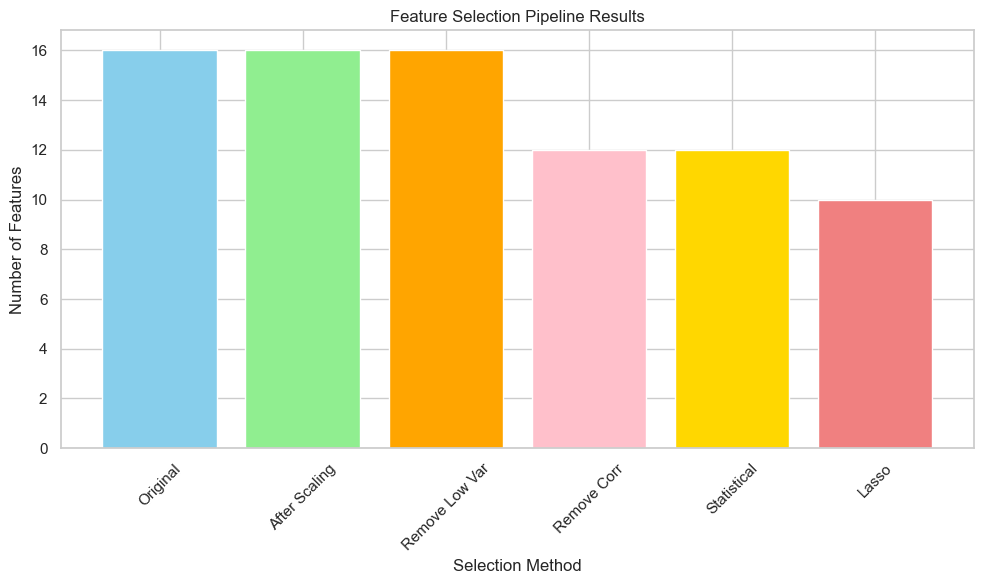

In [585]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_regression
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

# ============================================================================
# 1. FEATURE SCALING
# ============================================================================

def scale_features(df, target_col='trip_seconds'):
    """
    Scale all features using StandardScaler
    
    Parameters:
    -----------
    df : pandas DataFrame
        Input dataframe
    target_col : str
        Name of target column (won't be scaled)
    
    Returns:
    --------
    tuple: (scaled_df, scaler)
    """
    # Get feature columns (everything except target)
    feature_cols = [col for col in df.columns if col != target_col]
    
    # Separate features and target
    X = df[feature_cols]
    y = df[target_col]
    
    # Scale features
    scaler = StandardScaler()
    X_scaled = pd.DataFrame(
        scaler.fit_transform(X),
        columns=feature_cols,
        index=X.index
    )
    
    # Combine scaled features with target
    df_scaled = pd.concat([X_scaled, y], axis=1)
    
    print(f"✓ Scaled {len(feature_cols)} features")
    print(f"Dataset shape: {df_scaled.shape}")
    
    return df_scaled, scaler

# ============================================================================
# 2. REMOVE LOW VARIANCE FEATURES
# ============================================================================

def remove_low_variance_features(df, target_col='trip_seconds', threshold=0.01):
    """
    Remove features with very low variance (almost constant)
    
    Parameters:
    -----------
    df : pandas DataFrame
        Input dataframe (should be scaled)
    target_col : str
        Name of target column
    threshold : float
        Variance threshold (features below this are removed)
    
    Returns:
    --------
    pandas DataFrame with low variance features removed
    """
    # Get feature columns
    feature_cols = [col for col in df.columns if col != target_col]
    X = df[feature_cols]
    y = df[target_col]
    
    # Apply variance threshold
    selector = VarianceThreshold(threshold=threshold)
    X_selected = selector.fit_transform(X)
    
    # Get names of selected features
    selected_features = [col for col, keep in zip(feature_cols, selector.get_support()) if keep]
    removed_features = [col for col, keep in zip(feature_cols, selector.get_support()) if not keep]
    
    # Create new dataframe
    df_selected = pd.DataFrame(X_selected, columns=selected_features, index=X.index)
    df_final = pd.concat([df_selected, y], axis=1)
    
    print(f"✓ Removed {len(removed_features)} low variance features")
    print(f"✓ Kept {len(selected_features)} features")
    
    return df_final

# ============================================================================
# 3. REMOVE HIGHLY CORRELATED FEATURES
# ============================================================================

def remove_correlated_features(df, target_col='trip_seconds', threshold=0.9):
    """
    Remove one feature from each highly correlated pair
    
    Parameters:
    -----------
    df : pandas DataFrame
        Input dataframe
    target_col : str
        Name of target column
    threshold : float
        Correlation threshold (above this, one feature is removed)
    
    Returns:
    --------
    pandas DataFrame with highly correlated features removed
    """
    # Get feature columns
    feature_cols = [col for col in df.columns if col != target_col]
    X = df[feature_cols]
    
    # Calculate correlation matrix
    corr_matrix = X.corr().abs()
    
    # Find highly correlated pairs
    upper_triangle = corr_matrix.where(
        np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
    )
    
    # Find features to remove
    to_remove = [col for col in upper_triangle.columns if any(upper_triangle[col] > threshold)]
    
    # Keep features that are not highly correlated
    features_to_keep = [col for col in feature_cols if col not in to_remove]
    
    # Create new dataframe
    df_final = df[features_to_keep + [target_col]]
    
    print(f"✓ Removed {len(to_remove)} highly correlated features")
    print(f"✓ Kept {len(features_to_keep)} features")
    
    return df_final

# ============================================================================
# 4. SELECT BEST FEATURES USING STATISTICS
# ============================================================================

def select_best_features_statistical(df, target_col='trip_seconds', k=15):
    """
    Select k best features using statistical tests
    
    Parameters:
    -----------
    df : pandas DataFrame
        Input dataframe
    target_col : str
        Name of target column
    k : int
        Number of best features to select
    
    Returns:
    --------
    tuple: (selected_df, feature_scores)
    """
    # Get feature columns
    feature_cols = [col for col in df.columns if col != target_col]
    X = df[feature_cols]
    y = df[target_col]
    
    # Make sure k doesn't exceed available features
    k = min(k, len(feature_cols))
    
    # Select k best features using F-regression
    selector = SelectKBest(score_func=f_regression, k=k)
    X_selected = selector.fit_transform(X, y)
    
    # Get selected feature names and scores
    selected_features = [col for col, keep in zip(feature_cols, selector.get_support()) if keep]
    
    # Create scores dataframe
    feature_scores = pd.DataFrame({
        'feature': feature_cols,
        'score': selector.scores_,
        'selected': selector.get_support()
    }).sort_values('score', ascending=False)
    
    # Create new dataframe with selected features
    df_selected = pd.DataFrame(X_selected, columns=selected_features, index=X.index)
    df_final = pd.concat([df_selected, y], axis=1)
    
    print(f"✓ Selected {k} best features using statistical tests")
    print("Top 5 features:")
    for i, row in feature_scores.head().iterrows():
        status = "✓" if row['selected'] else "✗"
        print(f"  {status} {row['feature']}: {row['score']:.2f}")
    
    return df_final, feature_scores

# ============================================================================
# 5. SELECT FEATURES USING LASSO
# ============================================================================

def select_features_lasso(df, target_col='trip_seconds'):
    """
    Select features using Lasso regression (automatic feature selection)
    
    Parameters:
    -----------
    df : pandas DataFrame
        Input dataframe (should be scaled)
    target_col : str
        Name of target column
    
    Returns:
    --------
    tuple: (selected_df, lasso_results)
    """
    # Get feature columns
    feature_cols = [col for col in df.columns if col != target_col]
    X = df[feature_cols]
    y = df[target_col]
    
    # Use Lasso with cross-validation to find best regularization
    lasso = LassoCV(cv=5, random_state=42, max_iter=2000)
    lasso.fit(X, y)
    
    # Get selected features (coefficients not zero)
    selected_features = [col for col, coef in zip(feature_cols, lasso.coef_) if coef != 0]
    
    # Create results dataframe
    lasso_results = pd.DataFrame({
        'feature': feature_cols,
        'coefficient': lasso.coef_,
        'selected': lasso.coef_ != 0
    })
    lasso_results['abs_coefficient'] = np.abs(lasso_results['coefficient'])
    lasso_results = lasso_results.sort_values('abs_coefficient', ascending=False)
    
    # Create new dataframe with selected features
    df_final = df[selected_features + [target_col]]
    
    print(f"✓ Lasso selected {len(selected_features)} features")
    print("Top 5 most important features:")
    for i, row in lasso_results.head().iterrows():
        status = "✓" if row['selected'] else "✗"
        print(f"  {status} {row['feature']}: {row['coefficient']:.4f}")
    
    return df_final, lasso_results

# ============================================================================
# 6. COMPLETE FEATURE SELECTION PIPELINE
# ============================================================================

def feature_selection_pipeline(df, target_col='trip_seconds'):
    """
    Complete feature selection pipeline
    
    Parameters:
    -----------
    df : pandas DataFrame
        Input dataframe
    target_col : str
        Name of target column
    
    Returns:
    --------
    dict: Results from each step
    """
    print("🚀 Starting Feature Selection Pipeline")
    print("=" * 50)
    
    # Step 1: Feature Scaling
    print("\n📊 Step 1: Feature Scaling")
    df_scaled, scaler = scale_features(df, target_col)
    
    # Step 2: Remove Low Variance Features
    print("\n🔍 Step 2: Remove Low Variance Features")
    df_variance = remove_low_variance_features(df_scaled, target_col)
    
    # Step 3: Remove Highly Correlated Features
    print("\n🔗 Step 3: Remove Highly Correlated Features")
    df_correlation = remove_correlated_features(df_variance, target_col)
    
    # Step 4: Statistical Feature Selection
    print("\n📈 Step 4: Statistical Feature Selection")
    df_statistical, statistical_scores = select_best_features_statistical(df_correlation, target_col, k=15)
    
    # Step 5: Lasso Feature Selection
    print("\n🎯 Step 5: Lasso Feature Selection")
    df_lasso, lasso_results = select_features_lasso(df_correlation, target_col)
    
    # Summary
    print("\n" + "=" * 50)
    print("📋 FEATURE SELECTION SUMMARY")
    print("=" * 50)
    original_features = len([col for col in df.columns if col != target_col])
    variance_features = len([col for col in df_variance.columns if col != target_col])
    correlation_features = len([col for col in df_correlation.columns if col != target_col])
    statistical_features = len([col for col in df_statistical.columns if col != target_col])
    lasso_features = len([col for col in df_lasso.columns if col != target_col])
    
    print(f"Original features: {original_features}")
    print(f"After removing low variance: {variance_features}")
    print(f"After removing correlations: {correlation_features}")
    print(f"Statistical selection: {statistical_features}")
    print(f"Lasso selection: {lasso_features}")
    
    # Return all results
    results = {
        'original_data': df,
        'scaled_data': df_scaled,
        'variance_filtered': df_variance,
        'correlation_filtered': df_correlation,
        'statistical_selected': df_statistical,
        'lasso_selected': df_lasso,
        'scaler': scaler,
        'statistical_scores': statistical_scores,
        'lasso_results': lasso_results
    }
    
    return results

# ============================================================================
# 7. APPLY TO OUR RDS DATASET
# ============================================================================

# Run the complete pipeline on our rds dataset
print("Applying feature selection to your ride-sharing dataset...")
selection_results = feature_selection_pipeline(rds, target_col='trip_seconds')

# Choose final dataset (let's use the Lasso results as they're good for beginners)
rds_final = selection_results['lasso_selected']

print(f"\n🎉 Final dataset ready for modeling!")
print(f"Shape: {rds_final.shape}")
print(f"Features: {[col for col in rds_final.columns if col != 'trip_seconds']}")

# Show comparison of different methods
print("\n📊 Feature Selection Method Comparison:")
print(f"Statistical method selected: {selection_results['statistical_selected'].shape[1]-1} features")
print(f"Lasso method selected: {selection_results['lasso_selected'].shape[1]-1} features")

# Optional: Create a simple visualization
def plot_feature_selection_results(results):
    """Simple plot showing feature selection results"""
    
    # Data for plotting
    methods = ['Original', 'After Scaling', 'Remove Low Var', 'Remove Corr', 'Statistical', 'Lasso']
    feature_counts = [
        len([col for col in results['original_data'].columns if col != 'trip_seconds']),
        len([col for col in results['scaled_data'].columns if col != 'trip_seconds']),
        len([col for col in results['variance_filtered'].columns if col != 'trip_seconds']),
        len([col for col in results['correlation_filtered'].columns if col != 'trip_seconds']),
        len([col for col in results['statistical_selected'].columns if col != 'trip_seconds']),
        len([col for col in results['lasso_selected'].columns if col != 'trip_seconds'])
    ]
    
    plt.figure(figsize=(10, 6))
    plt.bar(methods, feature_counts, color=['skyblue', 'lightgreen', 'orange', 'pink', 'gold', 'lightcoral'])
    plt.title('Feature Selection Pipeline Results')
    plt.xlabel('Selection Method')
    plt.ylabel('Number of Features')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Create the plot
plot_feature_selection_results(selection_results)

In [584]:
rds_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114005 entries, 0 to 116332
Data columns (total 11 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   trip_miles                             114005 non-null  float64
 1   fare                                   114005 non-null  float64
 2   additional_charges                     114005 non-null  float64
 3   hour                                   114005 non-null  float64
 4   is_peak_hour                           114005 non-null  float64
 5   month                                  114005 non-null  float64
 6   temp_pickup                            114005 non-null  float64
 7   prcp_pickup                            114005 non-null  float64
 8   wspd_pickup                            114005 non-null  float64
 9   dropoff_community_area_target_encoded  114005 non-null  float64
 10  trip_seconds                           114005 non-null  int64

#### How to Interpret Results
After running the above pipeline, we'll see:
- **Number of features at each step**: Shows how many features remain
- **Feature importance scores**: Higher scores = more important features
- **Selected vs. removed features**: Which features made the cut

#### Why this Final Feature Set?
For this intro class, we were recommended to use the **Lasso results** because:
- Lasso automatically finds the right number of features
- It's designed to pick features that work well together
- It's less likely to overfit than using all features
- It's a standard method used in industry

After feature selection, we should have a clean dataset ready for machine learning! The selected features should:
- Be on the same scale (thanks to scaling)
- Be informative for prediction (thanks to selection)
- Work well together in models
- Not cause overfitting

*Our final dataset will be stored in `rds_final` and ready for model training!*

---

### Post-Prep EDA & Visualizations

In the earlier section (**VI. Data Exploration & Visualization 📊**, under *Exploratory Analysis & Visualization* in *Data Understanding*), we conducted a broad exploratory analysis of the ride-hailing dataset. This included general trends, distributions, and initial insights into trip duration patterns.

However, two key components remain to complete our descriptive analysis:

1. **Weather Data Correlation** – Investigating how various weather conditions (e.g., temperature, precipitation) relate to trip duration.
2. **Temporal Factors** – Analyzing how time-based variables (hour of day, day of week, etc.) influence trip duration.

These final analyses aim to uncover more specific relationships between trip duration and external contextual factors, providing a fuller picture before any predictive modeling or advanced statistical work.


In [419]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("whitegrid")                  # Clean grid background
sns.set_context("notebook")                 # Scale fonts for notebook
colors = sns.color_palette("colorblind")    # Global color palette

#### Temporal Factors - Descriptive Analysis

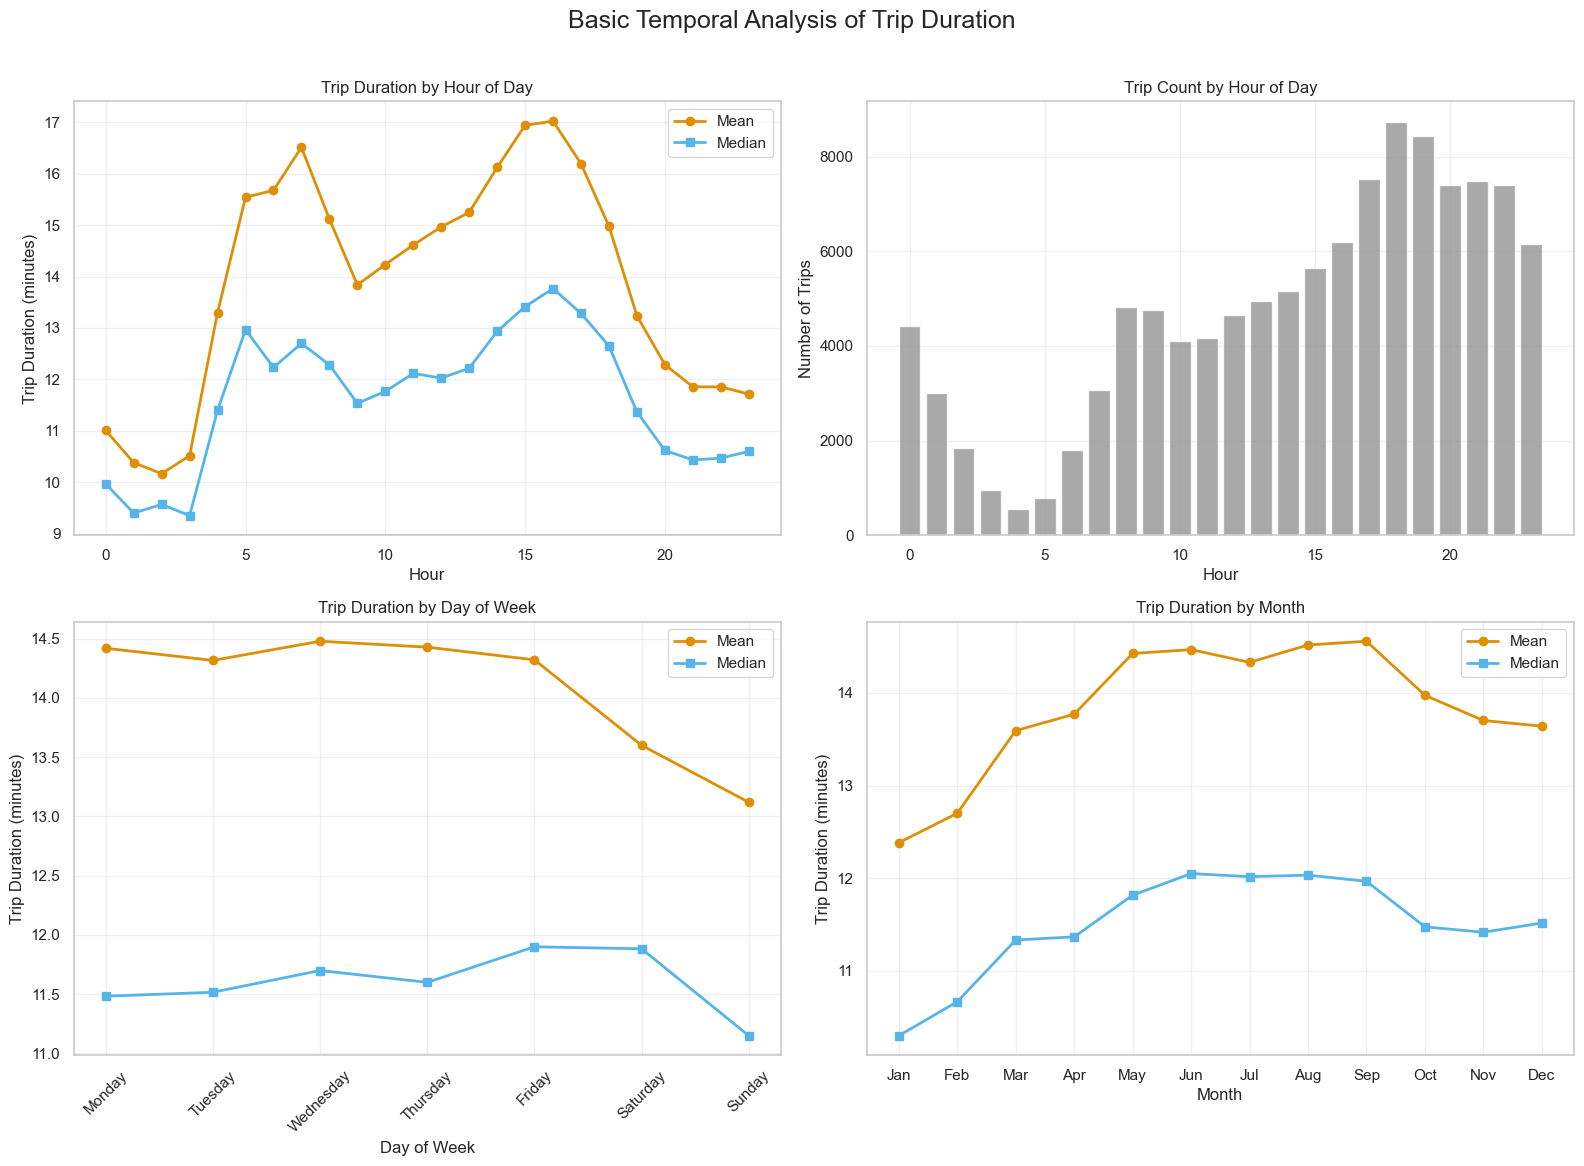


Temporal Statistics:
Peak hour (highest mean duration): 16
Peak hour (most trips): 18

Peak vs Non-Peak Hour Analysis:
                         mean               median  count
Non-Peak  817 sec (13.62 min)  680 sec (11.33 min)  76658
Peak      890 sec (14.83 min)  734 sec (12.23 min)  37347


In [ ]:
# TEMPORAL ANALYSIS & VISUALIZATIONS - Basic

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Basic Temporal Analysis of Trip Duration', fontsize=18, y=0.97)

# Trip duration by hour (in minutes)
hourly_stats = rds.groupby('hour')['trip_seconds'].agg(['mean', 'median', 'count'])
hourly_stats[['mean', 'median']] = hourly_stats[['mean', 'median']] / 60  # convert to minutes

axes[0, 0].plot(hourly_stats.index, hourly_stats['mean'], marker='o', label='Mean',
                linewidth=2, color=colors[1])
axes[0, 0].plot(hourly_stats.index, hourly_stats['median'], marker='s', label='Median',
                linewidth=2, color=colors[9])
axes[0, 0].set_title('Trip Duration by Hour of Day')
axes[0, 0].set_xlabel('Hour')
axes[0, 0].set_ylabel('Trip Duration (minutes)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Trip count by hour
axes[0, 1].bar(hourly_stats.index, hourly_stats['count'], alpha=0.8, color=colors[7])
axes[0, 1].set_title('Trip Count by Hour of Day')
axes[0, 1].set_xlabel('Hour')
axes[0, 1].set_ylabel('Number of Trips')
axes[0, 1].grid(True, alpha=0.3)

# Map day_of_week to names
day_name_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
                4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
rds['day_name'] = rds['day_of_week'].map(day_name_map)
daily_stats = rds.groupby('day_name')['trip_seconds'].agg(['mean', 'median', 'count'])
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_stats = daily_stats.reindex(day_order)
daily_stats[['mean', 'median']] = daily_stats[['mean', 'median']] / 60  # convert to minutes

axes[1, 0].plot(range(len(daily_stats)), daily_stats['mean'], marker='o', label='Mean',
                linewidth=2, color=colors[1])
axes[1, 0].plot(range(len(daily_stats)), daily_stats['median'], marker='s', label='Median',
                linewidth=2, color=colors[9])
axes[1, 0].set_title('Trip Duration by Day of Week')
axes[1, 0].set_xlabel('Day of Week')
axes[1, 0].set_ylabel('Trip Duration (minutes)')
axes[1, 0].set_xticks(range(len(daily_stats)))
axes[1, 0].set_xticklabels(daily_stats.index, rotation=45)
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Trip duration by month
monthly_stats = rds.groupby('month')['trip_seconds'].agg(['mean', 'median', 'count'])
monthly_stats[['mean', 'median']] = monthly_stats[['mean', 'median']] / 60  # convert to minutes
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

axes[1, 1].plot(monthly_stats.index, monthly_stats['mean'], marker='o', label='Mean',
                linewidth=2, color=colors[1])
axes[1, 1].plot(monthly_stats.index, monthly_stats['median'], marker='s', label='Median',
                linewidth=2, color=colors[9])
axes[1, 1].set_title('Trip Duration by Month')
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Trip Duration (minutes)')
axes[1, 1].set_xticks(monthly_stats.index)
axes[1, 1].set_xticklabels([month_names[i - 1] for i in monthly_stats.index])
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # leave space for suptitle
plt.show()

# Print temporal statistics (still in seconds here)
print("\nTemporal Statistics:")
print(f"Peak hour (highest mean duration): {hourly_stats['mean'].idxmax()}")
print(f"Peak hour (most trips): {hourly_stats['count'].idxmax()}")

# Peak vs Non-Peak hour analysis with durations in minutes
peak_stats = rds.groupby('is_peak_hour')['trip_seconds'].agg(['mean', 'median', 'count'])
peak_stats.index = ['Non-Peak', 'Peak']

peak_stats_formatted = peak_stats.copy()
peak_stats_formatted['mean'] = peak_stats['mean'].apply(lambda x: f"{x:.0f} sec ({x/60:.2f} min)")
peak_stats_formatted['median'] = peak_stats['median'].apply(lambda x: f"{x:.0f} sec ({x/60:.2f} min)")

print("\nPeak vs Non-Peak Hour Analysis:")
print(peak_stats_formatted)

# Drop created columns
rds.drop('day_name', axis=1, inplace=True)

**Insights:**

* **Trip Duration by Hour (Top-Left):**

  * Higher mean and median trip durations occur during peak hours, such as in the morning and evening.
  * Durations decrease afterward, likely as people arrive at their destinations (e.g., workplaces, schools).
  * 4 PM has the highest average trip duration, followed by 7 AM.

* **Trip Count by Hour (Top-Right):**

  * The number of trips generally increases steadily throughout the day.

* **Trip Duration by Day of Week (Bottom-Left):**

  * Trip durations are generally shorter on weekends compared to weekdays.

* **Trip Duration by Month (Bottom-Right):**

  * Longer trip durations are observed during the warmer (summer) months, while shorter durations are typical during typically colder times (winter).

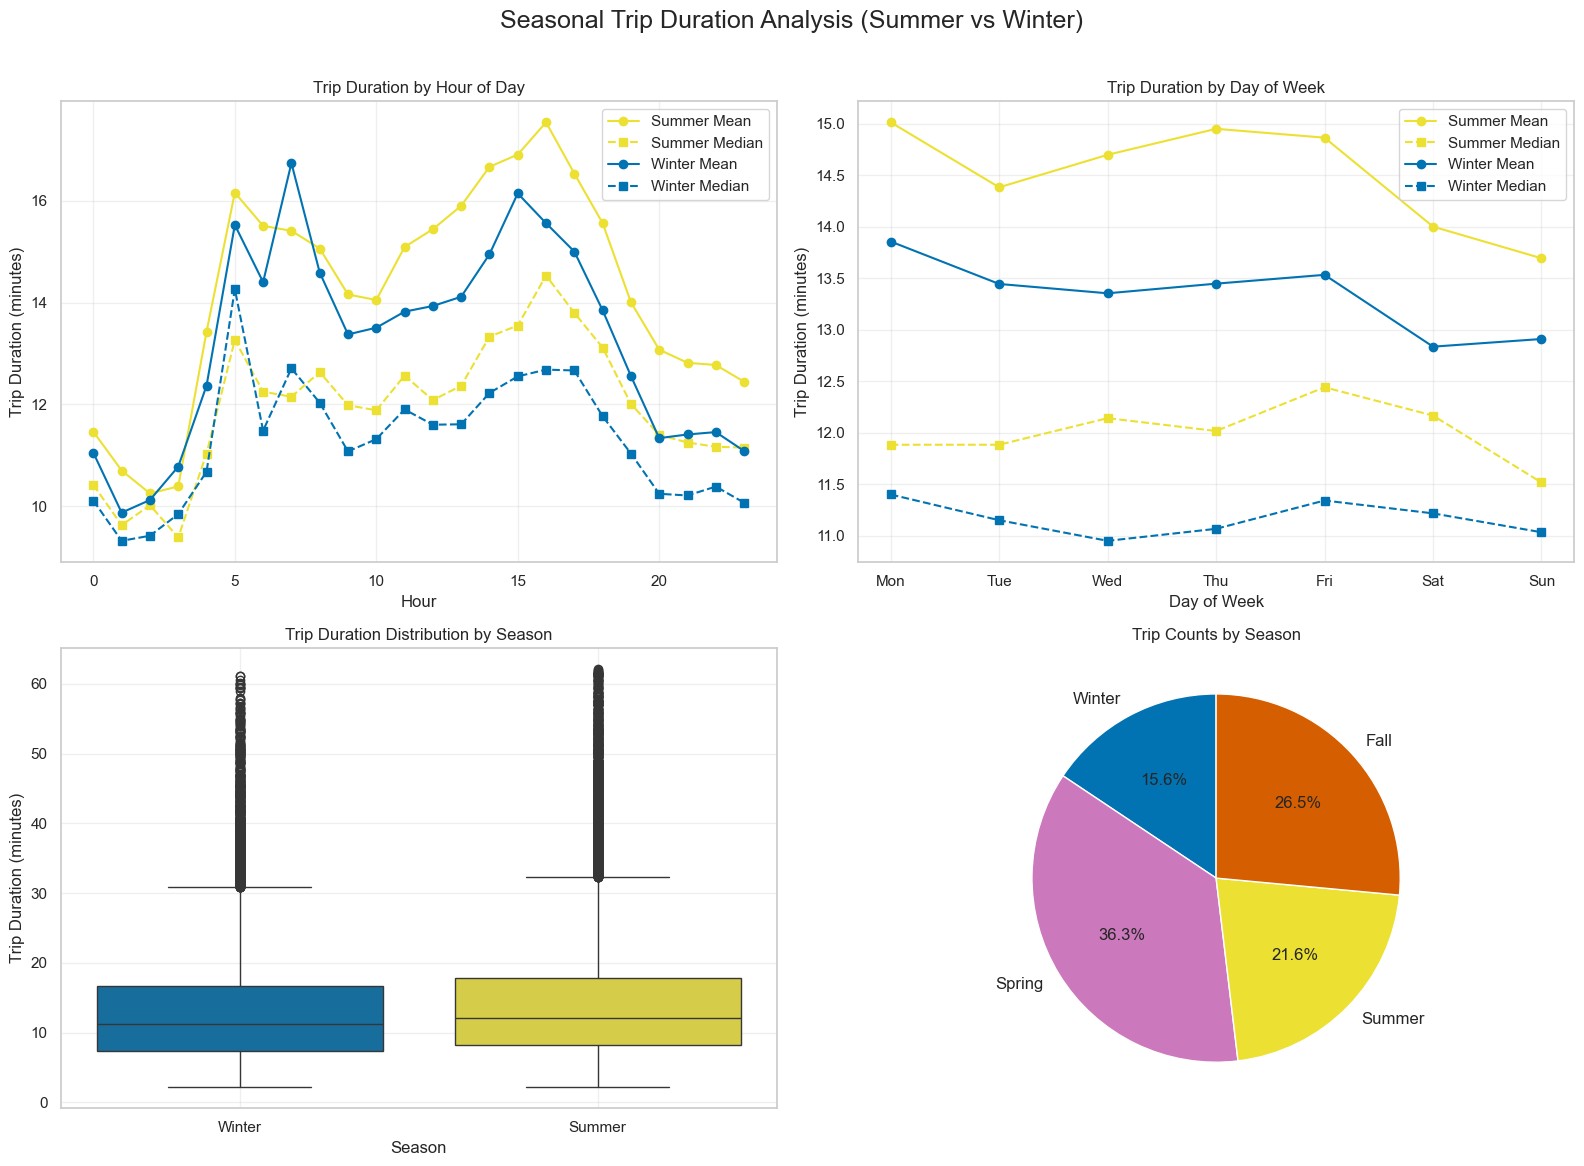

In [472]:
# TEMPORAL ANALYSIS & VISUALIZATIONS - Summer vs Winter

# Assign full seasons
def assign_season_full(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

rds['season'] = rds['month'].apply(assign_season_full)
season_df = rds[rds['season'].isin(['Summer', 'Winter'])].copy()
season_df['trip_minutes'] = season_df['trip_seconds'] / 60

# Map day_of_week to abbreviated names
day_name_map = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
season_df['day_name'] = season_df['day_of_week'].map(day_name_map)

# Plot layout
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Seasonal Trip Duration Analysis (Summer vs Winter)', fontsize=18, y=0.97)

### TOP LEFT: Duration by hour of day ###
hourly_stats = season_df.groupby(['season', 'hour'])['trip_minutes'].agg(['mean', 'median']).reset_index()

for season, color in zip(['Summer', 'Winter'], [colors[8], colors[0]]):
    subset = hourly_stats[hourly_stats['season'] == season]
    axes[0, 0].plot(subset['hour'], subset['mean'], marker='o', label=f'{season} Mean', color=color)
    axes[0, 0].plot(subset['hour'], subset['median'], marker='s', linestyle='--', label=f'{season} Median', color=color)

axes[0, 0].set_title('Trip Duration by Hour of Day')
axes[0, 0].set_xlabel('Hour')
axes[0, 0].set_ylabel('Trip Duration (minutes)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

### TOP RIGHT: Duration by day of week ###
daily_stats = season_df.groupby(['season', 'day_name'])['trip_minutes'].agg(['mean', 'median']).reset_index()
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
daily_stats['day_name'] = pd.Categorical(daily_stats['day_name'], categories=day_order, ordered=True)
daily_stats = daily_stats.sort_values('day_name')

for season, color in zip(['Summer', 'Winter'], [colors[8], colors[0]]):
    subset = daily_stats[daily_stats['season'] == season]
    x = np.arange(len(day_order))
    axes[0, 1].plot(x, subset['mean'], marker='o', label=f'{season} Mean', color=color)
    axes[0, 1].plot(x, subset['median'], marker='s', linestyle='--', label=f'{season} Median', color=color)

axes[0, 1].set_title('Trip Duration by Day of Week')
axes[0, 1].set_xlabel('Day of Week')
axes[0, 1].set_ylabel('Trip Duration (minutes)')
axes[0, 1].set_xticks(np.arange(len(day_order)))
axes[0, 1].set_xticklabels(day_order)
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

### BOTTOM LEFT: Boxplot ###
sns.boxplot(x='season', y='trip_minutes', data=season_df,
            palette={'Summer': colors[8], 'Winter': colors[0]},
            ax=axes[1, 0])
axes[1, 0].set_title('Trip Duration Distribution by Season')
axes[1, 0].set_xlabel('Season')
axes[1, 0].set_ylabel('Trip Duration (minutes)')
axes[1, 0].grid(True, alpha=0.3)

### BOTTOM RIGHT: Pie chart of trip counts for all seasons ###
season_counts = rds['season'].value_counts().reindex(['Winter', 'Spring', 'Summer', 'Fall'])
pie_colors = [colors[0], colors[4], colors[8], colors[3]]  # Winter, Spring, Summer, Fall (updated)

axes[1, 1].pie(season_counts, labels=season_counts.index, autopct='%1.1f%%',
               colors=pie_colors, startangle=90, textprops={'fontsize': 12})
axes[1, 1].set_title('Trip Counts by Season')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Drop the newly created columns from the original DataFrame 'rds'
rds.drop(columns=['season'], inplace=True)


*These plots highlight the influence of seasons on ride-hailing behavior. During the warmer months, people tend to take longer and more frequent trips.*

#### Weather Factors - Descriptive Analysis

Let's check how weather affects trip duration and other characteristics. First we check the effect of temperature, then rain, then wind speed.

**1) Temperatur Impact on…** *(using temp_pickup)*

… on Trip Duration:

Correlation: Temperature vs. Trip Duration
              temp_pickup  trip_seconds
temp_pickup      1.000000      0.028728
trip_seconds     0.028728      1.000000


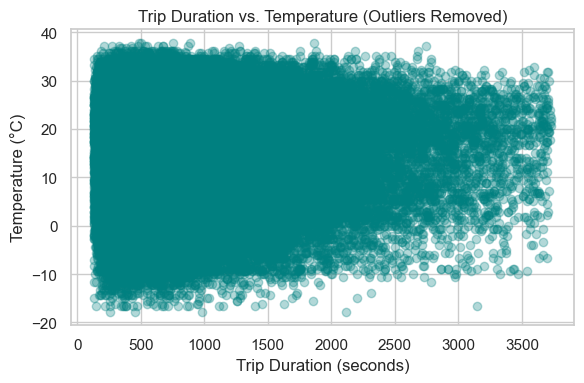

In [440]:
print("Correlation: Temperature vs. Trip Duration")
print(rds[['temp_pickup', 'trip_seconds']].corr())

plt.figure(figsize=(6, 4))
plt.scatter(rds['trip_seconds'], rds['temp_pickup'], alpha=0.3, color='teal')
plt.title('Trip Duration vs. Temperature (Outliers Removed)')
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.tight_layout()
plt.show()

>* The correlation between temperature and trip duration is very weak (**r ≈ 0.03**), indicating that **temperature has little to no effect on how long trips last**.
>* **Temperature** appears to have **little direct impact on trip duration** overall, which is a sensible finding.

>* More likely that **temperature affects the number of trips taken**, rather than how long each trip lasts.
>* However, at **very low or very high temperatures**, there is some observable effect on trip duration — suggesting that **extreme weather conditions** may still influence how long people stay in transit.

… on Trip Count:

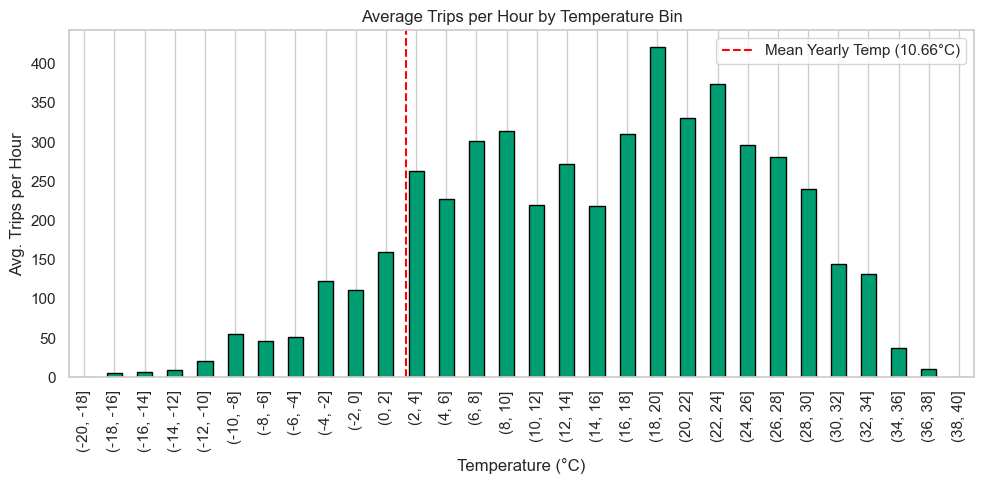

In [473]:
# Bin temperatures
temp_bins = pd.cut(rds['temp_pickup'], bins=range(-20, 41, 2))  # adjust bin range if needed

# Count trips per bin
trip_counts = rds.groupby(temp_bins).size()

# Count number of unique hours per bin (to normalize)
hours_per_bin = rds.groupby(temp_bins)['hour'].nunique()

# Compute average trips per hour per temperature bin
avg_trips_per_hour = trip_counts / hours_per_bin

# Plot
plt.figure(figsize=(10, 5))
avg_trips_per_hour.plot(kind='bar', color=colors[2], edgecolor='black')
plt.axvline(x=10.66, color='red', linestyle='--', label='Mean Yearly Temp (10.66°C)')
plt.title('Average Trips per Hour by Temperature Bin')
plt.xlabel('Temperature (°C)')
plt.ylabel('Avg. Trips per Hour')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


>* **Trip activity is highest** at temperatures just **around 20°C**, with **around 400 average trips per hour (18-20°C)**, indicating strong rider demand in mild to higher weather.
>* The **average yearly temperature of Chicago (10.66°C)** does not represent a major local peak but still falls within a **moderate range** where average trip counts per hour remain relatively high.
>* **Above-average temperatures** are associated with **increased trip activity** (e.g. in summer and spring).
>* **Lower avg. trip counts per hour** are observed during **very cold** and **very hot** conditions, suggesting that **extreme temperatures reduce ride demand**.

… Trip Frequency for Extreme Temperatures:

In [442]:
cold_threshold = -5
hot_threshold = 30

cold_trips_per_hour = rds[rds['temp_pickup'] <= cold_threshold].groupby('hour').size().mean()
hot_trips_per_hour = rds[rds['temp_pickup'] >= hot_threshold].groupby('hour').size().mean()

print(f"{cold_trips_per_hour:.2f} average trips/hour when temperature ≤ {cold_threshold}°C")
print(f"{hot_trips_per_hour:.2f} average trips/hour when temperature ≥ {hot_threshold}°C")

122.38 average trips/hour when temperature ≤ -5°C
273.11 average trips/hour when temperature ≥ 30°C


> People appear more likely to take a ride when temperatures are **very hot** compared to **very cold**. However, the **highest ride activity** generally occurs in **moderate temperature ranges**, suggesting that **mild weather is most favorable for ride-hailing** (see histogram above).

**2) Rain/Snow Impact on…** *(using prcp_pickup)*

… on Trip Duration:

Correlation: Precipitation vs. Trip Duration
              prcp_pickup  trip_seconds
prcp_pickup      1.000000     -0.010013
trip_seconds    -0.010013      1.000000


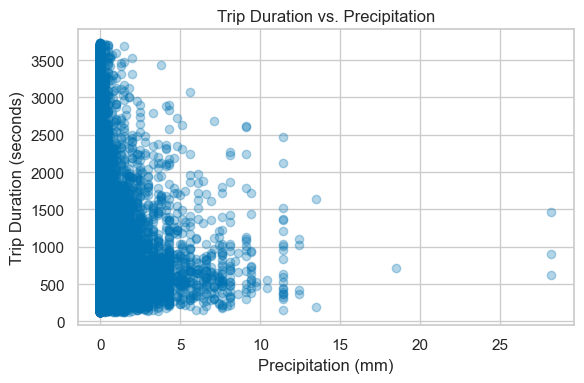

In [479]:
# Correlation between Precipitation and Trip Duration
print("Correlation: Precipitation vs. Trip Duration")
print(rds[['prcp_pickup', 'trip_seconds']].corr())

# Scatter plot: Precipitation on x-axis, Trip Duration on y-axis
plt.figure(figsize=(6, 4))
plt.scatter(rds['prcp_pickup'], rds['trip_seconds'], alpha=0.3, color=colors[0])
plt.title('Trip Duration vs. Precipitation')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Trip Duration (seconds)')
plt.grid(True)
plt.tight_layout()
plt.show()


> - Although a few shorter trips appear to occur during periods of higher precipitation, the overall relationship between precipitation and trip duration is **negligible**.
> - This is supported by the **Pearson correlation coefficient of -0.01**, which indicates **virtually no linear correlation** between the two variables.
> - In other words, **stronger precipitation does not consistently lead to shorter or longer trips** in this dataset.

… on Trip Frequency :

In [ ]:
# Average number of trips per hour when it's raining/snowing
rainy_trips_per_hour = rds[rds['prcp_pickup'] > 0].groupby('hour').size().mean()
print(f"{rainy_trips_per_hour:.2f} average trips per hour during rain or snow")

# Average number of trips per hour when it's dry
dry_trips_per_hour = rds[rds['prcp_pickup'] == 0].groupby('hour').size().mean()
print(f"{dry_trips_per_hour:.2f} average trips per hour during dry weather")


422.12 average trips per hour during rain or snow (pickup)
4328.08 average trips per hour during dry weather (pickup)


> - It appears that **rain or snow has a strong impact on trip volume**, with **nearly 10× fewer trips per hour** observed during precipitation events.
> - However, it's unclear whether this drop is directly caused by **precipitation itself**, or whether it’s influenced by **other weather-related factors** such as **temperature, wind speed**, or broader seasonal effects.
> - Further analysis would be needed to isolate the true driver behind this pattern.

**3) Windspeed Impact on…** *(using wspd_pickup)*

… on Trip Duration:

Correlation: Wind Speed vs. Trip Duration
              trip_seconds  wspd_pickup
trip_seconds      1.000000    -0.040871
wspd_pickup      -0.040871     1.000000


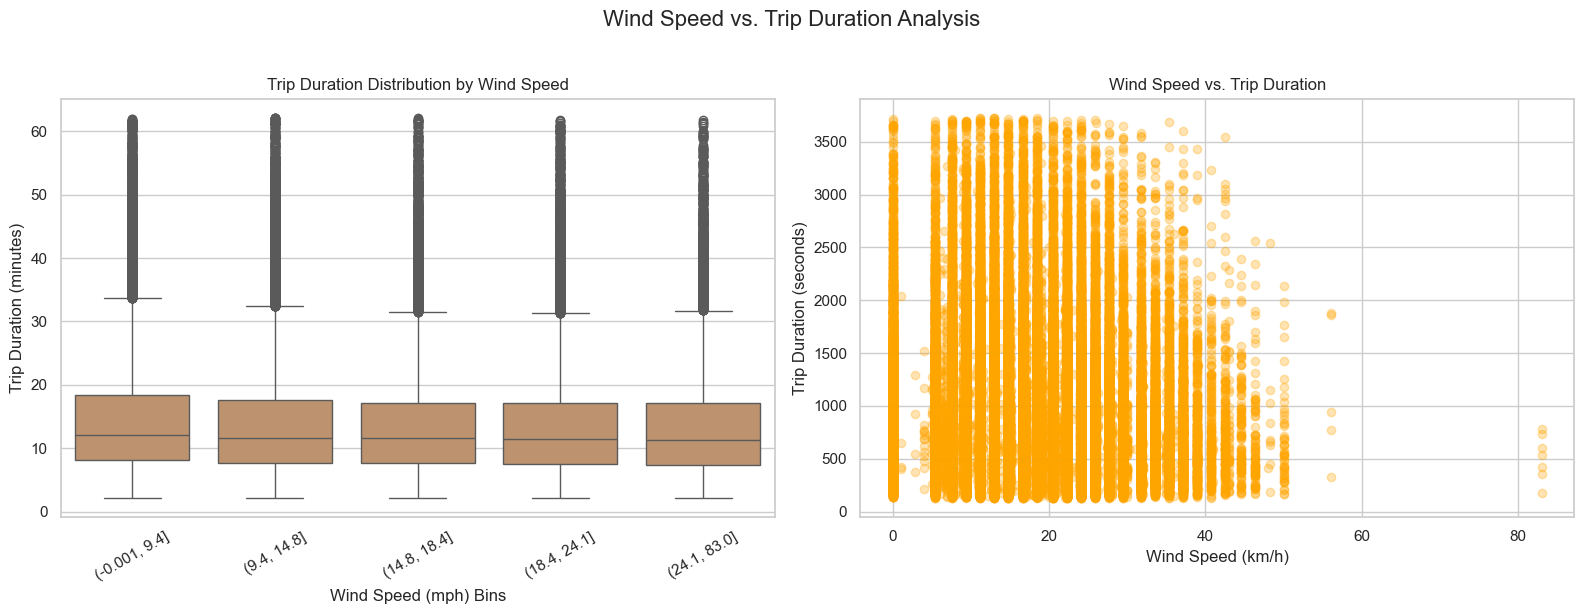

In [462]:
print("Correlation: Wind Speed vs. Trip Duration")
print(rds[['trip_seconds', 'wspd_pickup']].corr())

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Wind Speed vs. Trip Duration Analysis', fontsize=16, y=1.02)

# Boxplot: Trip Duration (minutes) by Wind Speed bins
sns.boxplot(ax=axes[0], data=rds, x='wspd_bin', y='trip_minutes',
            palette=[colors[5]] * rds['wspd_bin'].nunique())
axes[0].set_title('Trip Duration Distribution by Wind Speed')
axes[0].set_xlabel('Wind Speed (mph) Bins')
axes[0].set_ylabel('Trip Duration (minutes)')
axes[0].tick_params(axis='x', rotation=30)

# Scatter plot: Wind Speed vs Trip Duration (seconds)
axes[1].scatter(rds['wspd_pickup'], rds['trip_seconds'], alpha=0.3, color='orange')
axes[1].set_title('Wind Speed vs. Trip Duration')
axes[1].set_xlabel('Wind Speed (km/h)')
axes[1].set_ylabel('Trip Duration (seconds)')
axes[1].grid(True)

plt.tight_layout()
plt.show()



> Wind speed does not have a grand effect on trip duration either.

**Summary…**

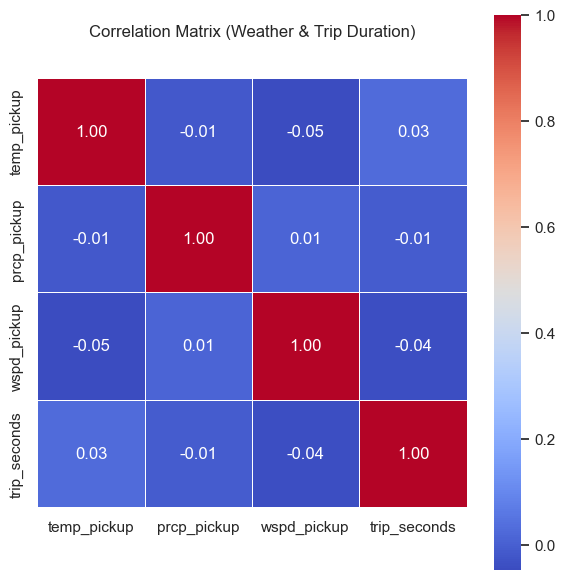

In [480]:
plt.figure(figsize=(6, 6))
weather_cols = ['temp_pickup', 'prcp_pickup', 'wspd_pickup', 'trip_seconds']
corr = rds[weather_cols].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Matrix (Weather & Trip Duration)', pad = 30)
plt.tight_layout()
plt.show()


---
## 🧠 Modeling

In this phase, we transition from data preparation to **building predictive models** to estimate **trip duration** (`trip_seconds`) based on various ride-hailing attributes in our dataset. This represents a classic **supervised learning** problem where we have labeled historical data (trip durations) and seek to learn a model that describes the relationship between input features and our target variable.

**The Machine Learning Framework**:
Following the canonical machine learning optimization problem presented in our course, our modeling approach consists of three key components:

1. **Hypothesis Function (h_θ)**: The algorithms define mathematical relationships between input features (pickup location, time of day, weather conditions, etc.) and trip duration
2. **Loss Function (ℓ)**: The models use regression metrics to quantify the difference between predicted and actual trip durations
3. **Optimization Method**: The algorithms find optimal parameters (θ) that minimize prediction error on our training data


### Modeling Approach Overview

In [ ]:
# scikit-learn (sklearn) provides tools for machine learning and model evaluation
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

**Model Selection Strategy**:
Following the CRISP-DM methodology, we implement and compare **two regression models**:

1. **Linear Regression** - Our baseline model that assumes a linear relationship between features and trip duration:
   - *Hypothesis Function*: Linear combination of input features
   - *Loss Function*: Squared error (sum of squared differences between predictions and actual values)
   - *Optimization*: (Usually) analytical solution using least squares method

2. **Random Forest Regressor** - Our main model designed to capture complex non-linear relationships:
   - *Hypothesis Function*: Ensemble of decision trees with axis-aligned splits
   - *Loss Function*: Typically uses mean squared error for regression
   - *Optimization*: Greedy search for optimal splits combined with bootstrap aggregating
   *(these sub points fro both models were derived by our lecture and questioning Claude AI about it)*

**Evaluation Strategy**:
To assess how well our models generalize to new observations (as emphasized in our lecture on predictive performance), we employ a **train-validation-test split** approach to avoid data leakage:

- **Training Set**: Used to learn model parameters (θ)
- **Validation Set**: Used to tune hyperparameters and select best model
- **Test Set**: Reserved for final, unbiased performance evaluation

We evaluate model performance using three complementary regression metrics:
- **Root Mean Squared Error (RMSE)**: Measures average prediction error, penalizing larger errors more heavily
- **Mean Absolute Error (MAE)**: Shows average absolute error size, treating all errors equally and being less sensitive to outliers  
- **R² Score**: Indicates how much variance in trip duration our model explains (closer to 1 = better)

By evaluating all three metrics together, we obtain a comprehensive view of model accuracy and reliability.

### Data Splitting Strategy

As mentioned following best practices from our course to avoid data leakage, we implement a **three-way data split** before any model training begins:

- **Training Set (60%)**: Used by algorithms to learn model parameters (θ)
- **Validation Set (20%)**: Used to tune hyperparameters and compare model performance
- **Test Set (20%)**: Reserved for final, unbiased evaluation of our best model

This approach ensures that our test set remains "unseen" throughout the model development process, providing a reliable estimate of how well our models will generalize to new trip duration predictions. The validation set allows us to make modeling decisions without contaminating our final performance assessment.

In [386]:
df = rds.copy()

# Define features and target
X = df.drop(columns=['trip_seconds'])
y = df['trip_seconds']

# Train-Validation-Test Split (60/20/20)
# First split: separate test set (20%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Second split: divide remaining data into train (60%) and validation (20%)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# Verify split proportions
print(f"Training set size: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
print(f"Validation set size: {len(X_val)} ({len(X_val)/len(X)*100:.1f}%)")
print(f"Test set size: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")
print(f"Total: {len(X_train) + len(X_val) + len(X_test)} observations")

Training set size: 68403 (60.0%)
Validation set size: 22801 (20.0%)
Test set size: 22801 (20.0%)
Total: 114005 observations


> **Note (for oursleves):** Choosing `random_state=42` seems to be a common convention in DS, as it ensures reproducibility, keeps results consistent across runs, and aligns with standard practice in tutorials and collaborative work.

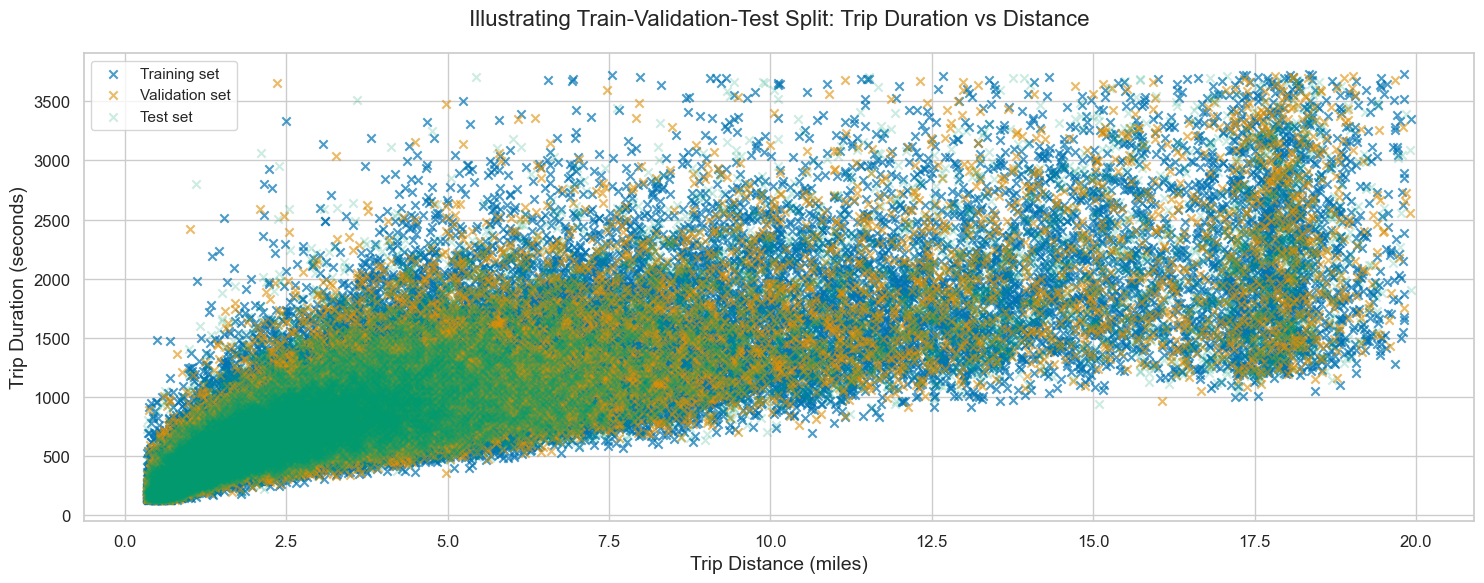

In [387]:
# VISUALIZATION OF SPLIT
# Create a scatter plot of trip distance vs duration, colored by dataset split

plt.figure(figsize=(15, 6))

# Training, validationa, and test data
plt.scatter(X_train['trip_miles'], y_train, marker='x', label='Training set', alpha=0.7, color=colors[0])
plt.scatter(X_val['trip_miles'], y_val, marker='x', label='Validation set', alpha=0.6, color=colors[1])
plt.scatter(X_test['trip_miles'], y_test, marker='x', label='Test set', alpha=0.2, color=colors[2])

# Labels and layout
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Trip Duration (seconds)')
plt.title('Illustrating Train-Validation-Test Split: Trip Duration vs Distance', pad=20)
plt.legend()
plt.tight_layout()
plt.show()


### II. Model 1: Linear Regression 1️⃣

**Model Description**:

**Linear Regression** serves as our **baseline model**, following the canonical machine learning optimization framework presented in the lecture. This model assumes a linear relationship between the input features and the target variable (`trip_seconds`), making it both interpretable and an excellent benchmark for comparison.

**Theoretical Foundation**:

Following the canonical ML optimization problem structure:
- **Hypothesis Function**: $h_\theta(x) = \sum_{j=1}^{n} \theta_j \cdot x_j = \theta^T x$
- **Loss Function**: Squared error loss $\ell(\hat{y}, y) = \frac{1}{2}(\hat{y} - y)^2$
- **Optimization Problem**: $\text{Minimize}_\theta \sum_{i=1}^{m} (\sum_{j=1}^{n} \theta_j \cdot x_j^{(i)} - y^{(i)})^2$

The optimal solution is found using the **Normal Equations**: $\theta^* = (X^T X)^{-1} X^T y$

**Implementation Considerations**:

Since Linear Regression requires numerical inputs, we preprocessed our data by removing all non-numeric columns (timestamps, location coordinates, and other `object`/`datetime` data types) that would cause computational errors. This ensures our feature matrix X contains only numerical values suitable for matrix operations.

**Model Training and Evaluation…**

In [ ]:
# Initialize Linear Regression Model
# fit_intercept=True allows the model to learn an intercept (bias) term
lin_mod = LinearRegression(fit_intercept=True)

# Train the model using the normal equations (implemented internally by sklearn)
lin_mod.fit(X_train, y_train)

# Generate predictions on test set
y_pred_lin = lin_mod.predict(X_test)

In [ ]:
# Calculate comprehensive evaluation metrics
mse_lin = mean_squared_error(y_test, y_pred_lin)
rmse_lin = np.sqrt(mse_lin)  # Root Mean Square Error (in original units)
mae_lin = mean_absolute_error(y_test, y_pred_lin)  # Mean Absolute Error
r2_lin = r2_score(y_test, y_pred_lin)  # Coefficient of Determination

# Display
print(f"LINEAR REGRESSION PERFORMANCE (BASELINE)")
print(f"  RMSE: {rmse_lin:.4f} seconds")
print(f"  MAE : {mae_lin:.4f} seconds") 
print(f"  R²  : {r2_lin:.4f}")

In [ ]:
# Model interpretability: Display feature coefficients
print(f"\nModel Coefficients (Top 15 by absolute value):")
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lin_mod.coef_
})
feature_importance['Abs_Coefficient'] = abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)

for i in range(min(15, len(feature_importance))):
    feat = feature_importance.iloc[i]
    print(f"  {feat['Feature']}: {feat['Coefficient']:.6f}")

print(f"\nIntercept (θ₀): {lin_mod.intercept_:.6f}")

**Model Characteristics**:

- **Bias-Variance Trade-off**: Linear regression typically has **high bias** but **low variance**, making it less prone to overfitting
- **Interpretability**: Each coefficient represents the expected change in trip duration (seconds) for a one-unit increase in the corresponding feature
- **Assumptions**: Assumes linear relationship between features and target, which may be limiting for complex transportation patterns
- **Computational Efficiency**: Uses closed-form solution (normal equations) for optimal parameters, making it very fast to train

**Expected Performance**:

As our baseline model, we expect Linear Regression to provide reasonable but potentially limited performance due to its assumption of linear relationships. More complex models should ideally improve upon these baseline metrics, particularly if non-linear patterns exist in the trip duration data.

In [ ]:
from sklearn.linear_model import LinearRegression

# Linear Regression Model
lin_mod = LinearRegression(fit_intercept=True) # fit_intercept=True allows the model to learn an intercept (bias) term
lin_mod.fit(X_train, y_train)
y_pred_lin = lin_mod.predict(X_test)



**Initial Linear Regression Results**:

The Linear Regression model achieves an **R² of 0.7111**, **explaining** approximately **71% of the variance** in trip duration. With an **RMSE of 304.85 seconds (~5 minutes)**, the model establishes a **reasonable baseline** for trip duration prediction. While not highly accurate, it provides a point of comparison for more complex models like Random Forest.

### III. Model 2: Random Forest Regressor 2️⃣

As our **second model**, we will be implementing a **Random Forest Regressor**. Random Forest is an **ensemble learning method** that builds multiple decision trees and combines their predictions through averaging, creating a more robust and accurate model than individual decision trees.

**Key Concepts** *(as taught in class and provided [link](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html))*:
- **Bagging (Bootstrap Aggregation)**: Random Forest uses bagging, which involves creating multiple bootstrap samples from the original training dataset by sampling with replacement. Each tree in the forest is trained on a different bootstrap sample, which introduces diversity and reduces variance in predictions.
- **Feature Randomness**: At each split in a decision tree, only a random subset of features is considered to determine the best split. This process decorrelates the trees and increases the overall model’s robustness.
- **Prediction Aggregation**: In regression problems like predicting trip duration, the final prediction is the mean of the predictions from all trees in the forest.

#### Initial Approach: Decision Tree Regressor

We initially considered implementing a **Decision Tree Regressor** as our second model. Decision trees work by recursively splitting the dataset into subsets based on feature values that minimize prediction error (typically using Mean Squared Error for regression tasks). At each split, the algorithm selects the feature and threshold that best separates the data, creating branches until certain stopping conditions are met (such as maximum depth or minimum samples per leaf).

**Key advantages of Decision Trees include:** *(based on output from Claude AI)*

- **Non-linear relationship modeling**: Unlike Linear Regression, which assumes linear relationships between features and the target variable, Decision Trees can naturally capture complex non-linear patterns and interactions between features
- **Robustness to outliers**: Decision trees are less sensitive to extreme values compared to linear models, as they use splits rather than mathematical functions
Handling heterogeneous data: They can work effectively with both numeric and categorical features without requiring extensive preprocessing (though our Chicago ride-hailing dataset consists primarily of numeric features)
- **Interpretability**: The tree structure provides clear decision paths that can be visualized and explained, though this advantage diminishes with very deep trees or datasets with many features
- **No distributional assumptions**: Unlike linear regression (which assumes linear relationships and often normal distribution of residuals), decision trees make no assumptions about the underlying data distribution, making them more flexible for datasets that don't meet parametric model requirements



This model was introduced and practiced in Workshop Session 11 and appeared well-suited for our prediction task of estimating trip duration (`trip_seconds`) based on ride attributes, given the likely non-linear relationships between factors like distance, time of day, and traffic conditions.

**Why We Kept Our Decision Tree Work**

Although we ultimately chose Random Forest as our second model, we decided to retain our initial Decision Tree implementation in this notebook, demonstrating an (unlucky) iterative modeling process. This may also provide a valuable baseline for comparison with the Random Forest results, and showcases some of our introductory understanding of both individual and ensemble tree-based methods.

Below, you can see our Decison Tree code. We did include an idea from ChatGPT to improve our Decision Tree model’s performance and avoid overfitting or underfitting, by applying **grid search** to find the **optimal combination of hyperparameters**. We used `GridSearchCV` from `sklearn.model_selection` to hyperparameter-tune and automate the process of training and evaluating multiple model configurations.

We defined a **parameter grid** with different values for `max_depth`, `min_samples_leaf`, and `min_samples_split`. These are key hyperparameters that directly influence the **structure**, **complexity**, and **generalization ability of the Decision Tree** (also: tools to do something about overfitting):
- `max_depth`: Sets **maximum depth of the tree**. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. A too high value of maximum depth causes overfitting (risk for memorizing the training data), whereas a too low value causes underfitting. *(see WS_11)*
- `min_samples_leaf`: Specifies **minimum number of samples required to be in a leaf node**. Higher values force tree to create broader, less specific leaf nodes, reducing variance.
- `min_samples_split`: Defines the **minimum number of samples required to split an internal node**. Increasing this helps prevent the tree from creating nodes based on very small subsets (can help with regularization).

In [ ]:
# Step 1: Define parameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_leaf': [1, 5, 10],
    'min_samples_split': [2, 10, 20]
}

Then, comes the initialization `GridSearchCV` with the following configuration (done with ChatGPT):

- `estimator`: A `DecisionTreeRegressor` model with a fixed `random_state=42` for reproducibility.
- `param_grid`: Parameter combinations from above to try.
- `scoring='neg_mean_squared_error'`: Tells the grid search to optimize for **lower Mean Squared Error (MSE)**. Since `GridSearchCV` maximizes the score, the MSE is negated.
- `cv=5`: Splits the data into 5 parts to evaluate model performance more reliably (**5-fold cross-validation**).
- `n_jobs=-1`: Runs in parallel across all CPU cores to speed up computation.
- `verbose=1`: Displays progress messages during the search.

In [ ]:
# Step 2: Initialize GridSearchCV
grid = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Step 3: Fit model on our training data
grid.fit(X_train, y_train)

# Step 4: Extract best model
best_dt = grid.best_estimator_

# Step 5: Predict on test data
y_pred_dt = best_dt.predict(X_test)

# Step 6: Calculate metrics
print("Best Decision Tree Performance:")
print(f"  RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_dt)):.4f}")
print(f"  MAE : {mean_absolute_error(y_test, y_pred_dt):.4f}")
print(f"  R²  : {r2_score(y_test, y_pred_dt):.4f}")

In [ ]:
# Further information on the fitted tree (from WS_11)
attributes = best_dt.tree_
print("Number of nodes: ", attributes.node_count)
print("Number of leafs: ", attributes.n_leaves)

Due to the **large number of features** in our dataset and the visibly **large number of nodes and leafs** here, plotting the full Decision Tree results in an **overly complex and unreadable visualization**. Instead, we display a **shallow version** of the tree for illustrative purposes only. Our primary focus is on comparing the **Linear Regression** and **Random Forest** models, so the simplified tree serves merely as a structural example rather than a central analysis (also just interesting for us to see).


In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

shallow_tree = DecisionTreeRegressor(max_depth=3, random_state=42)
shallow_tree.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(
    shallow_tree, 
    feature_names=X.columns, # Use column names from the dataset as labels in the tree plot
    filled=True, 
    rounded=True
)
plt.title("Simplified Decision Tree (max_depth=3)")
plt.show()


We will not go any further into this decision tree approach.

#### Transition to Random Forest Regressor 🌳

***Now**, to our actual second model, the **Random Forest** model…*

**Limitations of Individual Decision Trees**:
- **Overfitting tendency**: Can become overly complex and memorize training data
- **High variance**: Small data changes can result in very different trees
- **Instability**: Sensitive to minor data variations

**Advantages of Random Forest** - Why RF may be Superior:
- **Reduced Overfitting & Lower Variance**: By averaging predictions from multiple trees trained on diverse bootstrapped samples and random feature subsets, Random Forest reduces overfitting common to single trees and significantly lowers prediction variance.
- **Improved Generalization**: Training multiple trees on different data and feature subsets results in a robust model that generalizes well to unseen data.
- **Robustness to Missing Values**: The algorithm can handle missing data during training and still make reliable predictions, as different trees may encounter different subsets of features.
- **Feature Selection Robustness**: Random feature selection at each split prevents any single feature from dominating, improving model stability.
- **Scalability via Parallel Processing**: Trees are trained independently and can be processed in parallel, making Random Forest scalable to large datasets and feature spaces.

**Specific Benefits for our Prediction Task**:
- **Complex Feature Interactions in Urban Mobility**: It captures non-linear relationships and interactions between time, location, traffic, and weather (all crucial in predicting trip duration).
- **Temporal Variations**: Different trees can learn patterns like rush hour vs. off-peak and weekday vs. weekend effects.
- **Spatial Heterogeneity**: Some trees may implicitly specialize in different areas of the city, improving prediction across diverse neighborhoods.

**Limitations of**: *(based on Claude AI output)*
- **Interpretability**: The ensemble nature makes it less interpretable compared to a single decision tree.
- **Performance on Small Datasets**: May not perform well if the dataset is too small since the benefit of averaging many diverse trees is limited.


In [ ]:
from sklearn.ensemble import RandomForestRegressor

**Parameters Overview** *(from sklearn.ensemble.RandomForestRegressor)*
- `n_estimators`: Number of trees in the forest (commonly 100 to 1000).
- `criterion`: Loss function for split quality (default is 'squared_error' for regression).
- `bootstrap`: Whether bootstrap samples are used when building trees (default is `True`).
- `max_depth`, `min_samples_split`, `min_samples_leaf`: Parameters controlling tree complexity (explained further in our *Decision Tree* section). ***Note**: May do some tuning*
- `max_features`: Number of features considered at each split. 
    - E.g. `='log2'` means considering the base-2 logarithm of the total number of features at each split.
*Best for*: Situations where you want even fewer features considered per split, which can further reduce overfitting.
*Why*: More restrictive than e.g. sqrt, so might work better for datasets with many irrelevant features. *(according to Bing Search: Writer AI)*.
- `n_jobs`: Number of jobs to run in parallel.
    - **We chose**: `=-1` tells the model to use all available CPU cores for parallel processing. This speeds up training significantly, especially when building many trees (e.g., n_estimators=100).

In [ ]:
# 1) Initialize (base) Random Forest model
rf_base = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

**Hyperparameter Tuning with RandomizedSearchCV 🔧**

Since we liked the idea of using `GridSearchCV` to tune and find the best Decision Tree in our earlier model exploration (suggested to us by AI), we thought it would not be a bad idea to consider a similar tuning strategy here.

So, to improve our Random Forest model's performance, we used hyperparameter tuning.
While `GridSearchCV` is commonly used to exhaustively try all parameter combinations, it can be **computationally expensive** when the grid is large.  
Hence, due to the larger space and ensemble nature of Random Forests and *recommendation by ChatGPT* we're using `RandomizedSearchCV` instead.

**Why RandomizedSearchCV?**
- It lets us explore a **wide range of hyperparameter values** efficiently
- It’s **faster than GridSearchCV**, especially when many parameters are involved
- It tests only a **fixed number of random combinations** rather than all possible ones
- It still finds a **very good approximation of the best model**
- It helps **reduce training time** while maintaining strong performance

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# 2) Define parameter distributions to sample from
param_dist = {
    'max_depth': [10, 20, 30, 50, None],          # Removed very shallow trees (5), added deeper option (50)
    'min_samples_split': randint(2, 15),          # Narrowed upper bound slightly (more realistic split control)
    'min_samples_leaf': randint(1, 5),            # Smaller leaves perform better on large datasets
    'max_features': ['sqrt', 'log2', None]        # Try both popular feature strategies and the default (None = all)
}


# 3) Initialize RandomizedSearchCV
rf_search = RandomizedSearchCV(
    estimator=rf_base,             # The base Random Forest model we want to tune
    param_distributions=param_dist,  # Dictionary of parameters and value ranges to sample from
    n_iter=50,                     # Try 50 random combinations from the grid
    cv=5,                          # Use 5-fold cross-validation to evaluate each combination
    verbose=2,  # Print detailed progress messages for **each fold of each parameter combination**
)

*(**Tuning** was done with the help of general online resources and ChatGPT)*

In [ ]:
# 4) Fit to training data
rf_search.fit(X_train, y_train)

# 5) Get best model
best_rf = rf_search.best_estimator_

# 6) Predict with tuned model
y_pred_rf = best_rf.predict(X_test)

# 7) Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

print("Tuned Random Forest Performance:")
print(f"  RMSE: {rmse:.4f}")
print(f"  MAE : {mae:.4f}")
print(f"  R²  : {r2:.4f}")

In [ ]:
# Print best parameters found
print("\nBest Parameters Found:")
print(rf_search.best_params_)

#### Faster Version?

Since the `RandomizedSearchCV` process above uses **50 iterations** and **5-fold cross-validation**, it can take a **very long time** to run (here: around **3 hours**). While this setup is can work for thoroughly exploring the hyperparameter space, it’s not always practical during development or when working with time constraints.

To address this, we also created a **faster version** of the search process that significantly reduces the runtime. By:
- Reducing the number of iterations from 50 → 5
- Using only 2-fold cross-validation instead of 5
- Narrowing the parameter space slightly

…we get a good-enough approximation of optimal parameters in a fraction of the time.

This quick tuning setup is useful for:
- Prototyping and iterative testing
- Working on limited computing resources
- Getting early feedback on model performance

> It is recommended to use the faster version during development, and reserving the full version for final tuning before evaluation or deployment.


In [ ]:
# Quick Alternative Version Code:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# 1) Base model
rf_base = RandomForestRegressor(random_state=42, n_jobs=-1)

# 2) Very small parameter space
param_dist_ultraquick = {
    'max_depth': [10, None],
    'min_samples_split': randint(2, 6),
    'min_samples_leaf': randint(1, 3),
}

# 3) Initialize ultra-fast randomized search
rf_search_ultraquick = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_dist_ultraquick,
    n_iter=5,         # Only 5 random combos
    cv=2,             # 2-fold cross-validation
    verbose=2,
    random_state=42
)

# 4) Fit the search
rf_search_ultraquick.fit(X_train, y_train)

# 5) Get best model
best_rf_ultra = rf_search_ultraquick.best_estimator_

# 6) Predict
y_pred_ultra = best_rf_ultra.predict(X_test)

# 7) Evaluate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse_ultra = mean_squared_error(y_test, y_pred_ultra)
rmse_ultra = np.sqrt(mse_ultra)
mae_ultra = mean_absolute_error(y_test, y_pred_ultra)
r2_ultra = r2_score(y_test, y_pred_ultra)

print("Ultra-Quick Random Forest Performance:")
print(f"  RMSE: {rmse_ultra:.4f}")
print(f"  MAE : {mae_ultra:.4f}")
print(f"  R²  : {r2_ultra:.4f}")


In [ ]:
# Print best parameters found
print("\nBest Parameters Found:")
print(rf_search_ultraquick.best_params_)

Turns out…

---
## 📈 Evaluation

### Performance Comparison

| **Model**                 | **RMSE**          | **MAE**           | **R²** |
| ------------------------- | ----------------- | ----------------- | ------ |
| **Linear Regression**     | 304.85 (5.08 min) | 210.37 (3.51 min) | 0.7111 |
| (Decision Tree)           | 254.54 (4.24 min) | 168.63 (2.81 min) | 0.7986 |
| **Random Forest (tuned)** | 225.17 (3.75 min) | 151.07 (2.52 min) | 0.84   |
| Random Forest (untuned)   | 225.77 (3.76 min) | 152.02 (2.53 min) | 0.8415 |

**Note**: RF Tuned vs. RF Untuned

We noticed that the untuned Random Forest (before using `RandomizedSearchCV`) performed slightly better on the test set. However, this is likely due to the model overfitting more aggressively by using default hyperparameters like `max_depth=None`. With tuning, we trade off a bit of raw performance for more generalizable and robust behavior.

### Evaluation Visualizations

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create comparison plots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# 1. Predicted vs Actual - Linear Regression
axes[0,0].scatter(y_test, y_pred_lin, alpha=0.5)
axes[0,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axes[0,0].set_xlabel('Actual Trip Duration')
axes[0,0].set_ylabel('Predicted Trip Duration')
axes[0,0].set_title('Linear Regression: Predicted vs Actual')

# 2. Predicted vs Actual - Random Forest
axes[0,1].scatter(y_test, y_pred_rf, alpha=0.5)
axes[0,1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axes[0,1].set_xlabel('Actual Trip Duration')
axes[0,1].set_ylabel('Predicted Trip Duration')
axes[0,1].set_title('Random Forest: Predicted vs Actual')

# 3. Residual Plot - Linear Regression
residuals_lin = y_test - y_pred_lin
axes[1,0].scatter(y_pred_lin, residuals_lin, alpha=0.5)
axes[1,0].axhline(y=0, color='r', linestyle='--')
axes[1,0].set_xlabel('Predicted Trip Duration')
axes[1,0].set_ylabel('Residuals')
axes[1,0].set_title('Linear Regression: Residual Plot')

# 4. Residual Plot - Random Forest
residuals_rf = y_test - y_pred_rf
axes[1,1].scatter(y_pred_rf, residuals_rf, alpha=0.5)
axes[1,1].axhline(y=0, color='r', linestyle='--')
axes[1,1].set_xlabel('Predicted Trip Duration')
axes[1,1].set_ylabel('Residuals')
axes[1,1].set_title('Random Forest: Residual Plot')

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size and layout
plt.figure(figsize=(12, 5))

# --- Linear Regression subplot ---
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_lin, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
plt.xlabel('Actual Trip Duration (s)')
plt.ylabel('Predicted Duration (s)')
plt.title('Linear Regression')
plt.legend()

# --- Decision Tree subplot ---
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_dt, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
plt.xlabel('Actual Trip Duration (s)')
plt.ylabel('Predicted Duration (s)')
plt.title('Decision Tree Regressor')
plt.legend()

# Show all plots
plt.tight_layout()
plt.show()


### Feature Importance Analysis

In [ ]:
# Previous
# Edit:

# Get feature importances from the trained Random Forest model
importances = rf.feature_importances_  # or best_rf.feature_importances_ if you did tuning
feature_names = X.columns

# Create a pandas Series and sort it
feat_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plot the top 10 most important features
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_importance[:10], y=feat_importance.index[:10], palette='viridis')
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [ ]:
# Random Forest Feature Importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_mod.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Most Important Features - Random Forest')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()

In [ ]:
# Step 7 (Optional): Plot feature importances --- (for decison tree; probs not needed)
importances = best_dt.feature_importances_
sorted_idx = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.barh(range(len(sorted_idx)), importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), X.columns[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Decision Tree Feature Importances")
plt.tight_layout()
plt.show()

### Model Interpretation & Results

### Final Model Selection

### Other Comments